<a href="https://colab.research.google.com/github/MaYuetong/MaYuetong/blob/main/Vetlab_Visualisatons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import geopandas as gpd
import pandas as pd
import os
import matplotlib.pyplot as plt
import folium
import requests
from io import BytesIO
from zipfile import ZipFile

Mounted at /content/drive


In [ ]:

!pip install geopandas contextily matplotlib pandas openpyxl
!pip install geopandas contextily



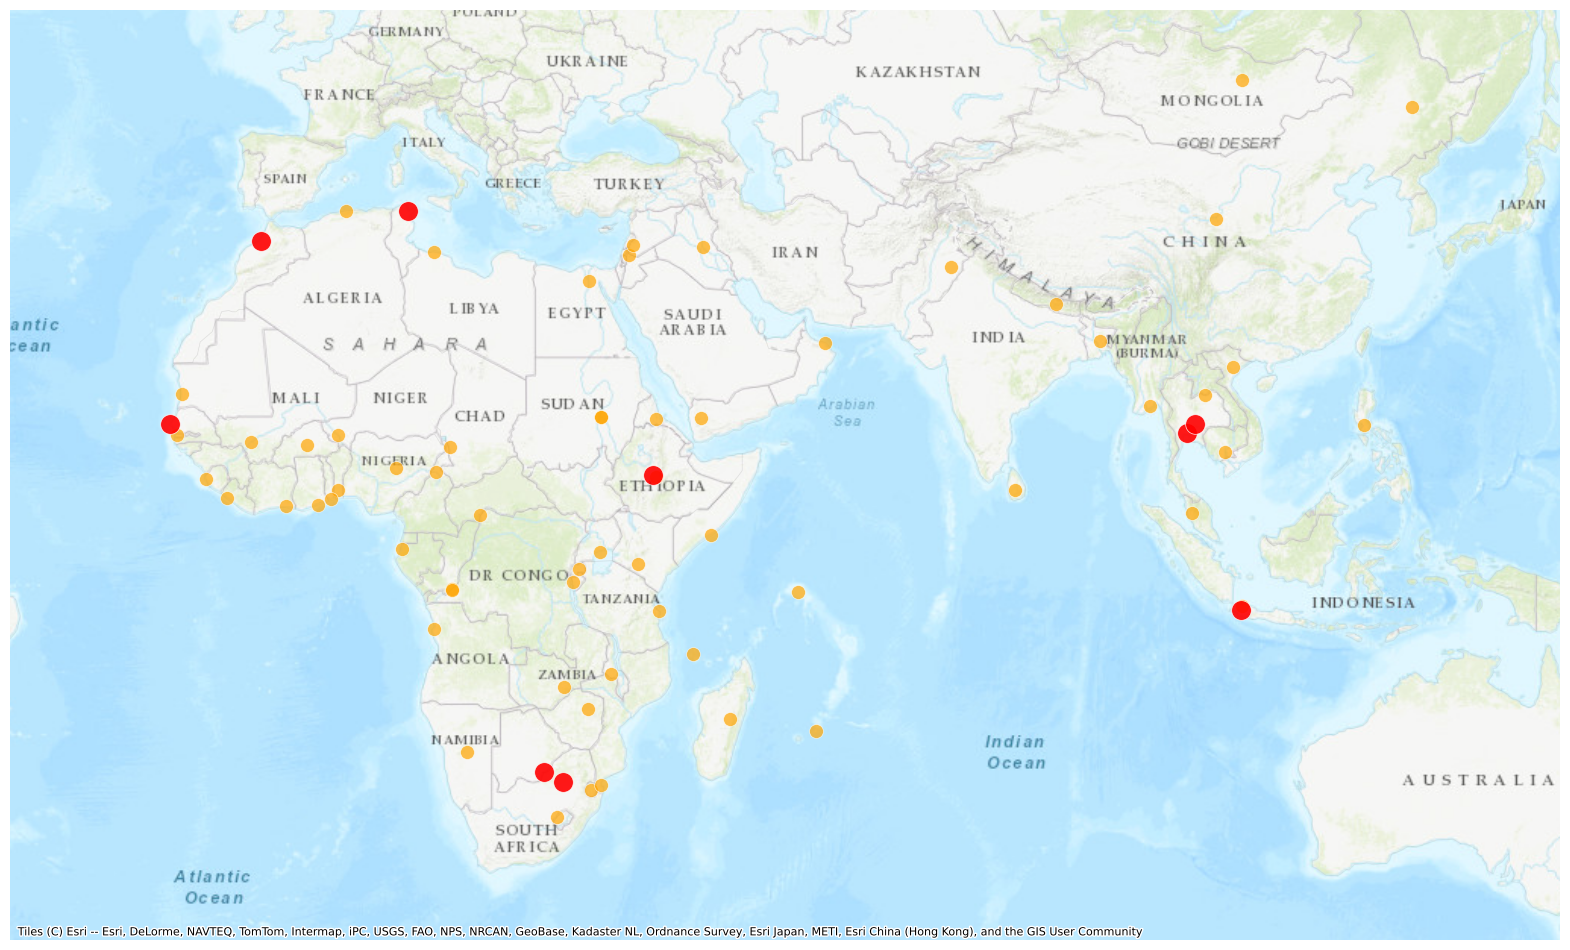

In [ ]:


# 导入库
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib import patheffects
import requests
from zipfile import ZipFile
from io import BytesIO
import matplotlib.patheffects as PathEffects

# 下载并解压 Natural Earth 数据集
def download_and_extract_natural_earth(url, extract_to='/content/'):
    response = requests.get(url)
    if response.status_code == 200:
        with ZipFile(BytesIO(response.content)) as zip_ref:
            zip_ref.extractall(extract_to)
    else:
        print("Failed to download data. Please check the URL or try again later.")

# 下载 Natural Earth 数据集
url = 'https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip'
download_and_extract_natural_earth(url)

# 加载世界地图数据
world = gpd.read_file('/content/ne_110m_admin_0_countries.shp')

# 加载实验室数据
file_path = '/content/drive/MyDrive/data/VETLAB Members all.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# 过滤掉无效的坐标（即缺失或为0的坐标）
data = data[(data['Pl. Lat'] != 0) & (data['Pl. Lon'] != 0)]

# 将实验室数据转换为 GeoDataFrame，使用 'Pl. Lat' 和 'Pl. Lon'
labs_gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['Pl. Lon'], data['Pl. Lat']), crs="EPSG:4326")

# 转换实验室数据的投影以匹配地图的投影 (EPSG:3857)
labs_gdf = labs_gdf.to_crs(epsg=3857)

# 创建绘图对象，设置合理的显示范围
fig, ax = plt.subplots(figsize=(20, 15))
ax.set_xlim([-4000000, 16000000])
ax.set_ylim([-5000000, 7000000])

# 绘制偏移位置的板块来模拟阴影
world.plot(ax=ax, color="none", edgecolor="lightgrey", linewidth=1.5, alpha=0.5, zorder=0)

# 转换投影并绘制基础地图
world = world.to_crs(epsg=3857)
world.plot(ax=ax, color="whitesmoke", edgecolor="grey", linewidth=0.5, alpha=0.1, zorder=1)



# 使用 ArcGIS World Terrain 瓦片图层添加地形和阴影效果
ctx.add_basemap(ax, crs="EPSG:3857", source=ctx.providers.Esri.WorldTopoMap)

# 绘制实验室位置，区分 "Developed Lab" 和其他
for idx, row in labs_gdf.iterrows():
    x, y = row.geometry.x, row.geometry.y
    if row['Developed Lab'] == 1:
        # 已开发实验室 - 红色标记，标记更大
        ax.scatter(x, y, color='red', s=200, alpha=0.9, edgecolor="white", linewidth=0.5, zorder=9)
    else:
        # 未开发实验室 - 橙色标记，标记较小
        ax.scatter(x, y, color='orange', s=100, alpha=0.7, edgecolor="white", linewidth=0.5, zorder=9)

# 添加国家名称标注，仅标注非洲和亚洲的国家
#for idx, row in world.iterrows():
    #country_name = row['NAME']
    # 判断国家是否在实验室数据的 'Country Name' 列中
    #if country_name in labs_gdf['Country Name'].values:
        # 如果是实验室所在国家，标注为黑色并加粗
        #x, y = row['geometry'].centroid.coords[0]
        #ax.text(x, y, country_name, fontsize=8, ha='center', color="grey", zorder=6, alpha=0.6,
                #path_effects=[patheffects.withStroke(linewidth=3, foreground="white")])
    #elif row['CONTINENT'] in ['Africa', 'Asia']:
        # 否则，标注为灰色
        #x, y = row['geometry'].centroid.coords[0]
       # ax.text(x, y, country_name, fontsize=9, ha='center', color="black", fontweight='bold', zorder=5, alpha=0.6)

# 移除坐标轴
ax.set_axis_off()

plt.show()


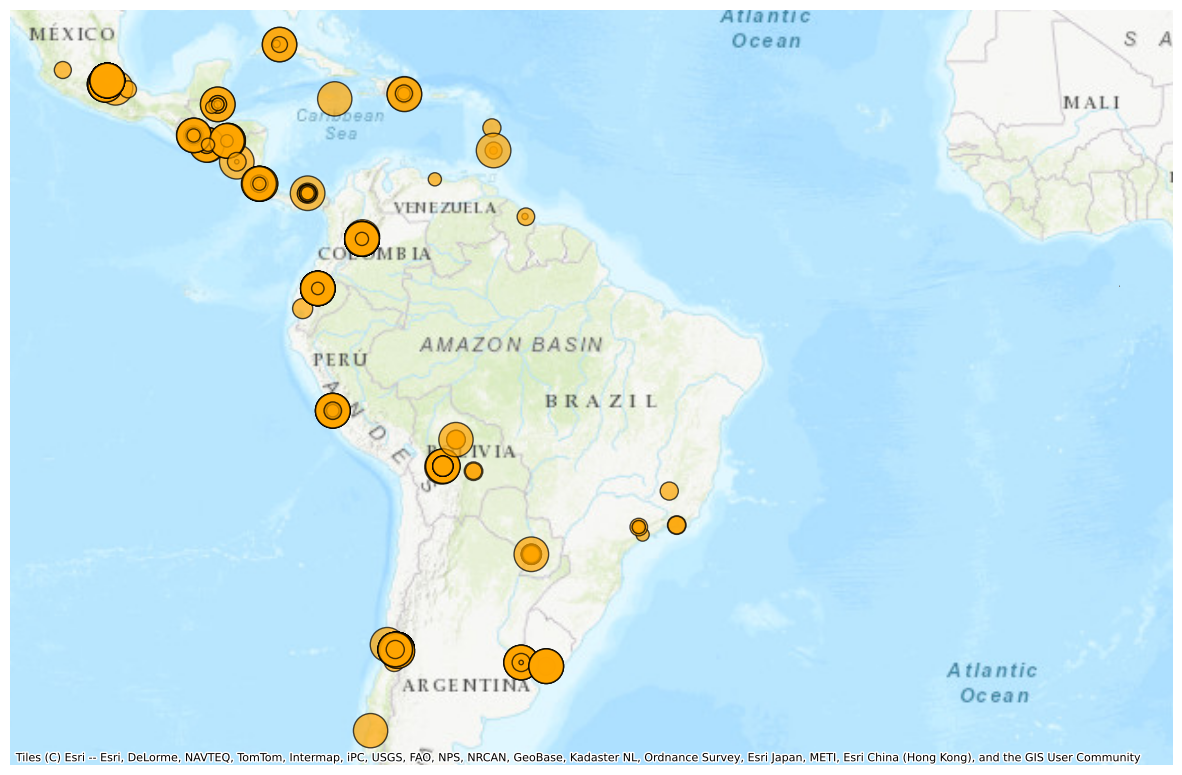

In [ ]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import pandas as pd
from zipfile import ZipFile
from io import BytesIO
import requests

# 下载并解压 Natural Earth 数据集
def download_and_extract_natural_earth(url, extract_to='/content/'):
    response = requests.get(url)
    if response.status_code == 200:
        with ZipFile(BytesIO(response.content)) as zip_ref:
            zip_ref.extractall(extract_to)
    else:
        print("Failed to download data. Please check the URL or try again later.")

# 下载 Natural Earth 数据集
url = 'https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip'
download_and_extract_natural_earth(url)

# 加载世界地图数据
world = gpd.read_file('/content/ne_110m_admin_0_countries.shp')

# 定义 Excel 文件路径
file_path = '/content/drive/MyDrive/data/iVetNet participants.xlsx'

# 读取Excel数据
data = pd.read_excel(file_path)

# 过滤拉丁美洲的参与者数据
latin_america_data = data[data['Iaea Region Name'] == 'Latin America']

# 将经纬度数据转换为 GeoDataFrame
latin_america_gdf = gpd.GeoDataFrame(
    latin_america_data,
    geometry=gpd.points_from_xy(latin_america_data['Longitude'], latin_america_data['Latitude']),
    crs="EPSG:4326"
)

# 统计每个国家的参与者数量
country_counts = latin_america_data['Country Name'].value_counts()
latin_america_gdf['Participant Count'] = latin_america_gdf['Country Name'].map(country_counts)

# 筛选拉丁美洲区域的国家
latin_america = world[(world['CONTINENT'] == 'North America') | (world['CONTINENT'] == 'South America')]

# 设置绘图
fig, ax = plt.subplots(figsize=(15, 12))

# 绘制拉丁美洲地图
latin_america.plot(ax=ax, color="whitesmoke", edgecolor="grey", linewidth=0.5)

# 转换参与者数据的投影以匹配底图
latin_america_gdf = latin_america_gdf.to_crs(epsg=3857)
latin_america = latin_america.to_crs(epsg=3857)

# 使用气泡图表示参与者数量
latin_america_gdf.plot(
    ax=ax,
    markersize=latin_america_gdf['Participant Count'] * 10,
    color='orange',
    alpha=0.7,
    edgecolor="black"
)

# 使用 ArcGIS World Terrain 瓦片图层添加地形和阴影效果
ctx.add_basemap(ax, crs="EPSG:3857", source=ctx.providers.Esri.WorldTopoMap)

# 移除坐标轴
ax.set_axis_off()

plt.show()


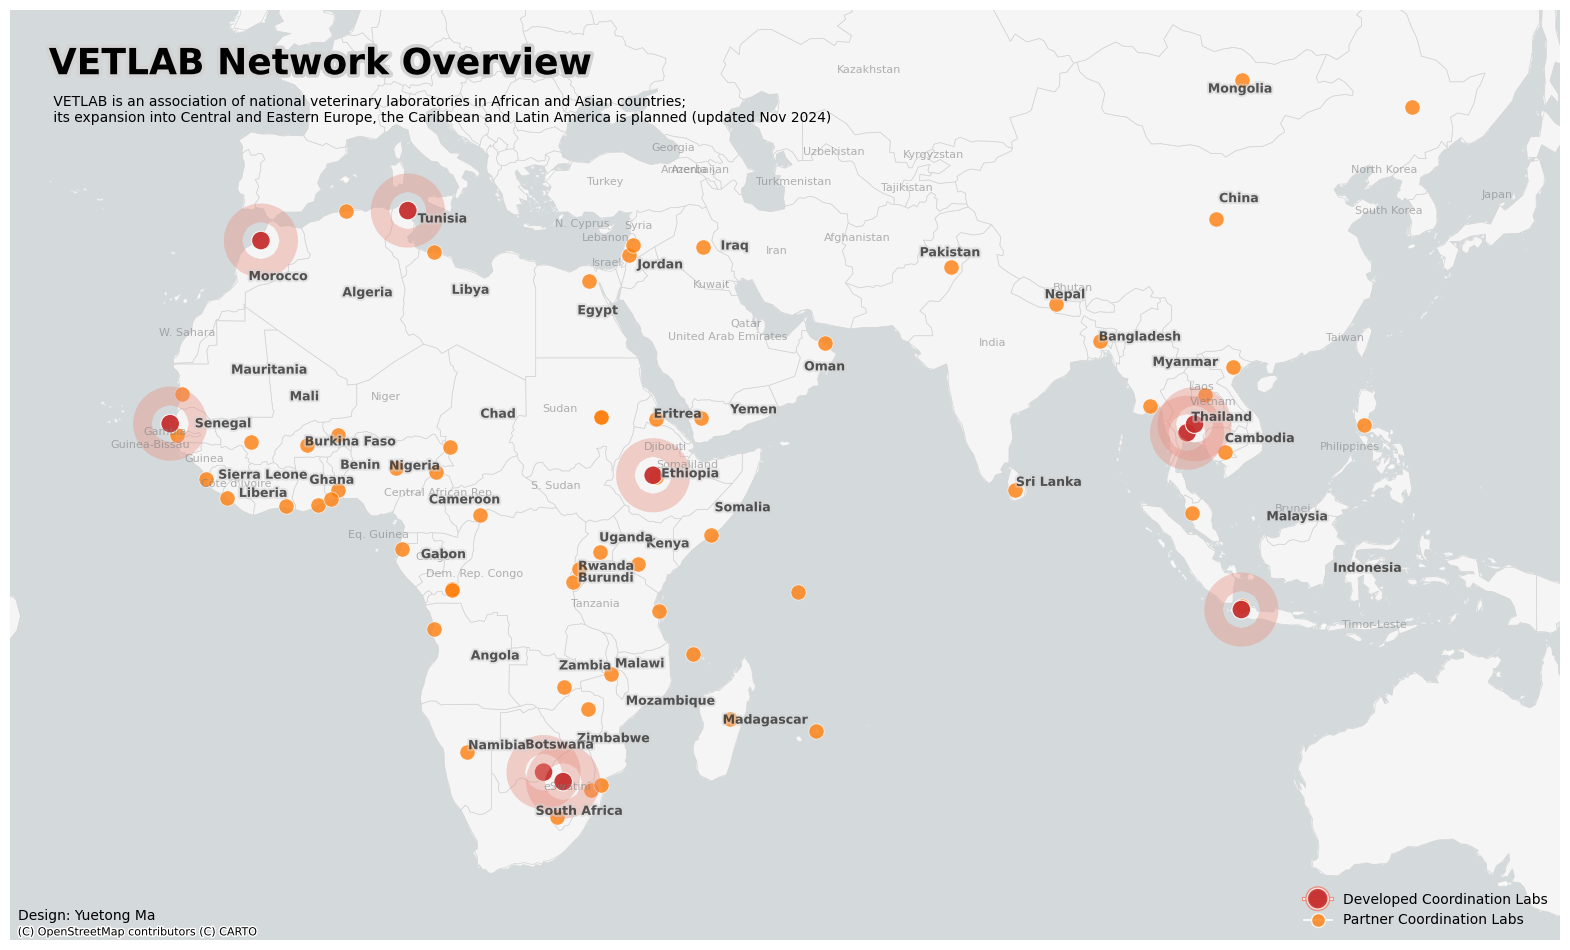

In [ ]:
# 导入库
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib import patheffects
import requests
from zipfile import ZipFile
from io import BytesIO
from shapely.geometry import box

# 下载并解压 Natural Earth 数据集
def download_and_extract_natural_earth(url, extract_to='/content/'):
    response = requests.get(url)
    if response.status_code == 200:
        with ZipFile(BytesIO(response.content)) as zip_ref:
            zip_ref.extractall(extract_to)
    else:
        print("Failed to download data. Please check the URL or try again later.")

# 下载 Natural Earth 数据集
url = 'https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip'
download_and_extract_natural_earth(url)

# 加载世界地图数据
world = gpd.read_file('/content/ne_110m_admin_0_countries.shp')

# 加载实验室数据
file_path = '/content/drive/MyDrive/data/VETLAB Members all.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# 过滤掉无效的坐标（即缺失或为0的坐标）
data = data[(data['Pl. Lat'] != 0) & (data['Pl. Lon'] != 0)]

# 将实验室数据转换为 GeoDataFrame，使用 'Pl. Lat' 和 'Pl. Lon'
labs_gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['Pl. Lon'], data['Pl. Lat']), crs="EPSG:4326")

# 转换实验室数据的投影以匹配地图的投影 (EPSG:3857)
labs_gdf = labs_gdf.to_crs(epsg=3857)

# 创建绘图对象，设置合理的显示范围
fig, ax = plt.subplots(figsize=(20, 15))
ax.set_xlim([-4000000, 16000000])
ax.set_ylim([-5000000, 7000000])

# 转换投影并绘制基础地图
world = world.to_crs(epsg=3857)
world.plot(ax=ax, color="whitesmoke", edgecolor="lightgrey", linewidth=0.5, zorder=1)

# 使用 CartoDB Positron 瓦片图层添加背景，但减少海洋的影响
ctx.add_basemap(ax, crs="EPSG:3857", source=ctx.providers.CartoDB.PositronNoLabels, zoom=5)

# 绘制实验室位置，区分 "Developed Lab" 和其他
for idx, row in labs_gdf.iterrows():
    x, y = row.geometry.x, row.geometry.y
    if row['Developed Lab'] == 1:
        # 已开发实验室 - 绿色标记，标记更大，添加阴影效果，强调影响力（表示 hub）
        ax.scatter(x, y, color='#C62E2E', s=180, alpha=0.9, edgecolor="white", linewidth=0.8, zorder=5,
                   path_effects=[patheffects.withStroke(linewidth=40, foreground="#E78F81", alpha=0.4)])
    else:
        # 未开发实验室 - 橙色标记，标记较小
        ax.scatter(x, y, color='#ff7f0e', s=120, alpha=0.8, edgecolor="white", linewidth=0.5, zorder=4)

# 存储已经标注的区域（以用于检测重叠）
labeled_boxes = []

# 添加国家名称标注，仅标注非洲和亚洲的国家
for idx, row in world.iterrows():
    country_name = row['NAME']
    if country_name in ["Lesotho", "Togo","Saudi Arabia"]:
        continue
    # 获取国家几何中心坐标
    x, y = row['geometry'].centroid.coords[0]

    # 手动调整特定国家的名称位置，防止重叠
    if country_name == "Tunisia":
        x += 200000
        y += 200000
    elif country_name == "Libya":
        x -= 300000
        y += 200000
    elif country_name == "Zimbabwe":
        y -= 300000
    elif country_name == "Pakistan":
        y += 300000
    elif country_name == "Bhutan":
        x -= 100000
        y += 200000
    elif country_name == "Eswatini":
        x += 200000
        y -= 200000
    elif country_name == "Botiswana":
        y -= 100000
    elif country_name == "Iraq":
        x += 300000

    # 创建国家标注的边界盒
    country_box = box(x - 50000, y - 50000, x + 50000, y + 50000)

    # 检查当前国家的边界盒是否与已有的标注重叠
    if any(country_box.intersects(existing_box) for existing_box in labeled_boxes):
        continue  # 如果重叠，跳过这个国家的标注

    # 将不重叠的国家边界盒添加到列表中
    labeled_boxes.append(country_box)

    # 判断国家是否在实验室数据的 'Country Name' 列中
    if country_name in labs_gdf['Country Name'].values:
        # 如果是实验室所在国家，标注为黑色并加粗
        ax.text(x, y, country_name, fontsize=9, ha='left', color="black", fontweight='bold', zorder=6, alpha=0.5,
                path_effects=[patheffects.withStroke(linewidth=3, foreground="lightgrey")])
    elif row['CONTINENT'] in ['Africa', 'Asia']:
        # 否则，标注为灰色
        ax.text(x, y, country_name, fontsize=8, ha='right', color="grey", zorder=5, alpha=0.6)

# 添加左上角的标题
ax.text(-3.5e6, 6.3e6, "VETLAB Network Overview", fontsize=26, color='black', fontweight='bold', va='center', ha='left', zorder=11,
        path_effects=[patheffects.withStroke(linewidth=5, foreground="lightgrey")])

# 添加左下角的描述文本
description_text = (" VETLAB is an association of national veterinary laboratories in African and Asian countries;\n"
 " its expansion into Central and Eastern Europe, the Caribbean and Latin America is planned (updated Nov 2024)\n")
ax.text(-3.5e6, 5.9e6, description_text, fontsize=10, color='black', va='top', ha='left', zorder=11)

#footer_text = ("Design: Yuetong Ma, 2024.\n" )
#ax.text(-3.9e6, -4.5e6, footer_text, fontsize=10, color='black', va='top', ha='left', zorder=11, alpha=0.6)
#footer_text = ("VETLAB is an association of national veterinary laboratories\n"
 #"in African and Asian countries; its expansion into Central and Eastern Europe, .\n"
 #"the Caribbean and Latin America is planned.")
#ax.text(-3.9e6, -4e6, footer_text, fontsize=10, color='white', va='top', ha='left', zorder=11, alpha=1)
footer_text = ("Design: Yuetong Ma")
ax.text(-3.9e6, -4.6e6, footer_text, fontsize=10,  family='SimHei', color='black', va='top', ha='left', zorder=11, alpha=1)

# 添加图例
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Developed Coordination Labs',
                          markerfacecolor='#C62E2E', markersize=15, alpha=0.8, path_effects=[patheffects.withStroke(linewidth=3, foreground="#E78F81")]),
                   Line2D([0], [0], marker='o', color='w', label='Partner Coordination Labs',
                          markerfacecolor='#ff7f0e', markersize=10, alpha=0.8)]
ax.legend(handles=legend_elements, loc='lower right', frameon=False, framealpha=0.9, fontsize=10, fancybox=True)

# 移除坐标轴
ax.set_axis_off()

# 显示图形并保存高清图片
plt.savefig('/content/drive/MyDrive/figures/Vetlabs_Overview_HighRes_001.png', dpi=300, bbox_inches='tight')
plt.show()



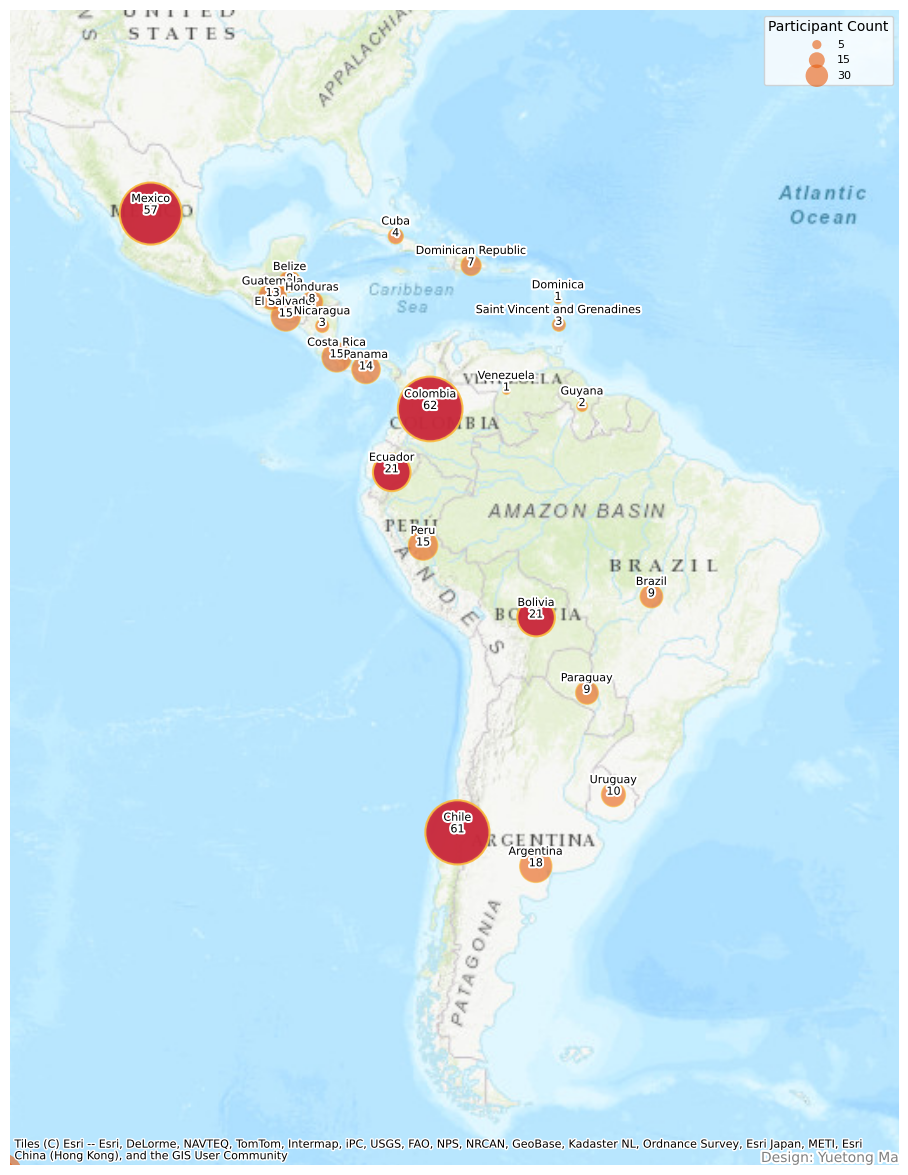

In [ ]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import pandas as pd
from zipfile import ZipFile
from io import BytesIO
import requests
import matplotlib.patheffects as PathEffects

# Define the download and extraction function
def download_and_extract_natural_earth(url, extract_to='/content/'):
    response = requests.get(url)
    if response.status_code == 200:
        with ZipFile(BytesIO(response.content)) as zip_ref:
            zip_ref.extractall(extract_to)
    else:
        print("Failed to download data. Please check the URL or try again later.")

# Download Natural Earth dataset
url = 'https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip'
download_and_extract_natural_earth(url)

# Load the world map data
world = gpd.read_file('/content/ne_110m_admin_0_countries.shp')

# Load the Excel data file
file_path = '/content/drive/MyDrive/data/iVetNet participants.xlsx'
data = pd.read_excel(file_path)

# Filter Latin America participants
latin_america_data = data[data['Iaea Region Name'] == 'Latin America'].dropna(subset=['Latitude', 'Longitude'])

# Clean up country names
latin_america_data['Country Name'] = latin_america_data['Country Name'].replace({
    "Dominican Republic (the)": "Dominican Republic",
    "Venezuela (Bolivarian Republic of)": "Venezuela",
})

# Count participants by country
country_counts = latin_america_data.groupby('Country Name').size().reset_index(name='Participant Count')

# Define country centers
country_centers = {
    "Argentina": (-38.4161, -63.6167),
    "Belize": (17.1899, -88.4976),
    "Bolivia": (-16.2902, -63.5887),
    "Brazil": (-14.2350, -51.9253),
    "Chile": (-35.6751, -71.5430),
    "Colombia": (4.5709, -74.2973),
    "Costa Rica": (9.7489, -83.7534),
    "Cuba": (21.5218, -77.7812),
    "Dominica": (15.4149, -61.3700),
    "Dominican Republic": (18.7357, -70.1627),
    "Ecuador": (-1.8312, -78.1834),
    "El Salvador": (13.7942, -88.8965),
    "Guatemala": (15.7835, -90.2308),
    "Guyana": (4.8604, -58.9302),
    "Honduras": (15.2000, -86.2419),
    "Mexico": (23.6345, -102.5528),
    "Nicaragua": (12.8654, -85.2072),
    "Panama": (8.5380, -80.7821),
    "Paraguay": (-23.4425, -58.4438),
    "Peru": (-9.1899, -75.0152),
    "Saint Vincent and Grenadines": (12.9843, -61.2872),
    "Uruguay": (-32.5228, -55.7658),
    "Venezuela": (6.4238, -66.5897)
}

# Map country names to coordinates
country_counts = country_counts[country_counts['Country Name'].isin(country_centers.keys())]
country_counts['Latitude'] = country_counts['Country Name'].map(lambda x: country_centers[x][0])
country_counts['Longitude'] = country_counts['Country Name'].map(lambda x: country_centers[x][1])

# Identify the top 5 countries
top_5_countries = country_counts.nlargest(5, 'Participant Count')

# Create GeoDataFrames
country_gdf = gpd.GeoDataFrame(
    country_counts,
    geometry=gpd.points_from_xy(country_counts['Longitude'], country_counts['Latitude']),
    crs="EPSG:4326"
)
top_5_gdf = gpd.GeoDataFrame(
    top_5_countries,
    geometry=gpd.points_from_xy(top_5_countries['Longitude'], top_5_countries['Latitude']),
    crs="EPSG:4326"
)

# Filter for Latin America countries on the world map
latin_america = world[(world['CONTINENT'] == 'North America') | (world['CONTINENT'] == 'South America')]

# Set up the plot
fig, ax = plt.subplots(figsize=(20, 15))
ax.set_xlim([-13000000, -3000000])
ax.set_ylim([-8000000, 5000000])

# Plot Latin America map
latin_america.plot(ax=ax, color="whitesmoke", edgecolor="grey", linewidth=0.5)

# Transform projections
country_gdf = country_gdf.to_crs(epsg=3857)
top_5_gdf = top_5_gdf.to_crs(epsg=3857)
latin_america = latin_america.to_crs(epsg=3857)

# Plot regular countries
bubble_color = "#E85C0D"
country_gdf.plot(
    ax=ax,
    markersize=country_gdf['Participant Count'] * 30,  # Adjust bubble size
    color=bubble_color,
    alpha=0.6,
    edgecolor="#FABC3F"
)

# Highlight top 5 countries with a different style
highlight_color = "#C7253E"  # Gold color for highlights
top_5_gdf.plot(
    ax=ax,
    markersize=top_5_gdf['Participant Count'] * 35,  # Adjust bubble size
    color=highlight_color,
    alpha=0.9,
    edgecolor="#FABC3F",
    linewidth=1.5
)

# Add basemap
ctx.add_basemap(ax, crs="EPSG:3857", source=ctx.providers.Esri.WorldTopoMap)

# Label each country with its name and participant count
for idx, row in country_gdf.iterrows():
    plt.text(
        row.geometry.x, row.geometry.y,
        f"{row['Country Name']}\n{row['Participant Count']}",
        fontsize=8,
        ha='center',
        color="black",
        path_effects=[PathEffects.withStroke(linewidth=3, foreground="white")]
    )

# Legend for bubble sizes
legend_sizes = [5, 15, 30]  # Representative counts
for size in legend_sizes:
    plt.scatter([], [], s=size * 35, color=bubble_color, alpha=0.6, edgecolor="none",
                label=f"{size}")

ax.legend(title="Participant Count", loc="upper right", fontsize=8, markerscale=0.5)

# Hide axes
ax.set_axis_off()

# Add design credit in the bottom right corner
plt.text(
    1, 0, "Design: Yuetong Ma",
    fontsize=10, color="grey",
    ha='right', va='bottom',
    transform=ax.transAxes,
    path_effects=[PathEffects.withStroke(linewidth=3, foreground="white")]
)

# Save and display
plt.savefig('/content/drive/MyDrive/figures/Latin_America_iVetNet_participants_highlighted.png', dpi=300, bbox_inches='tight')
plt.show()


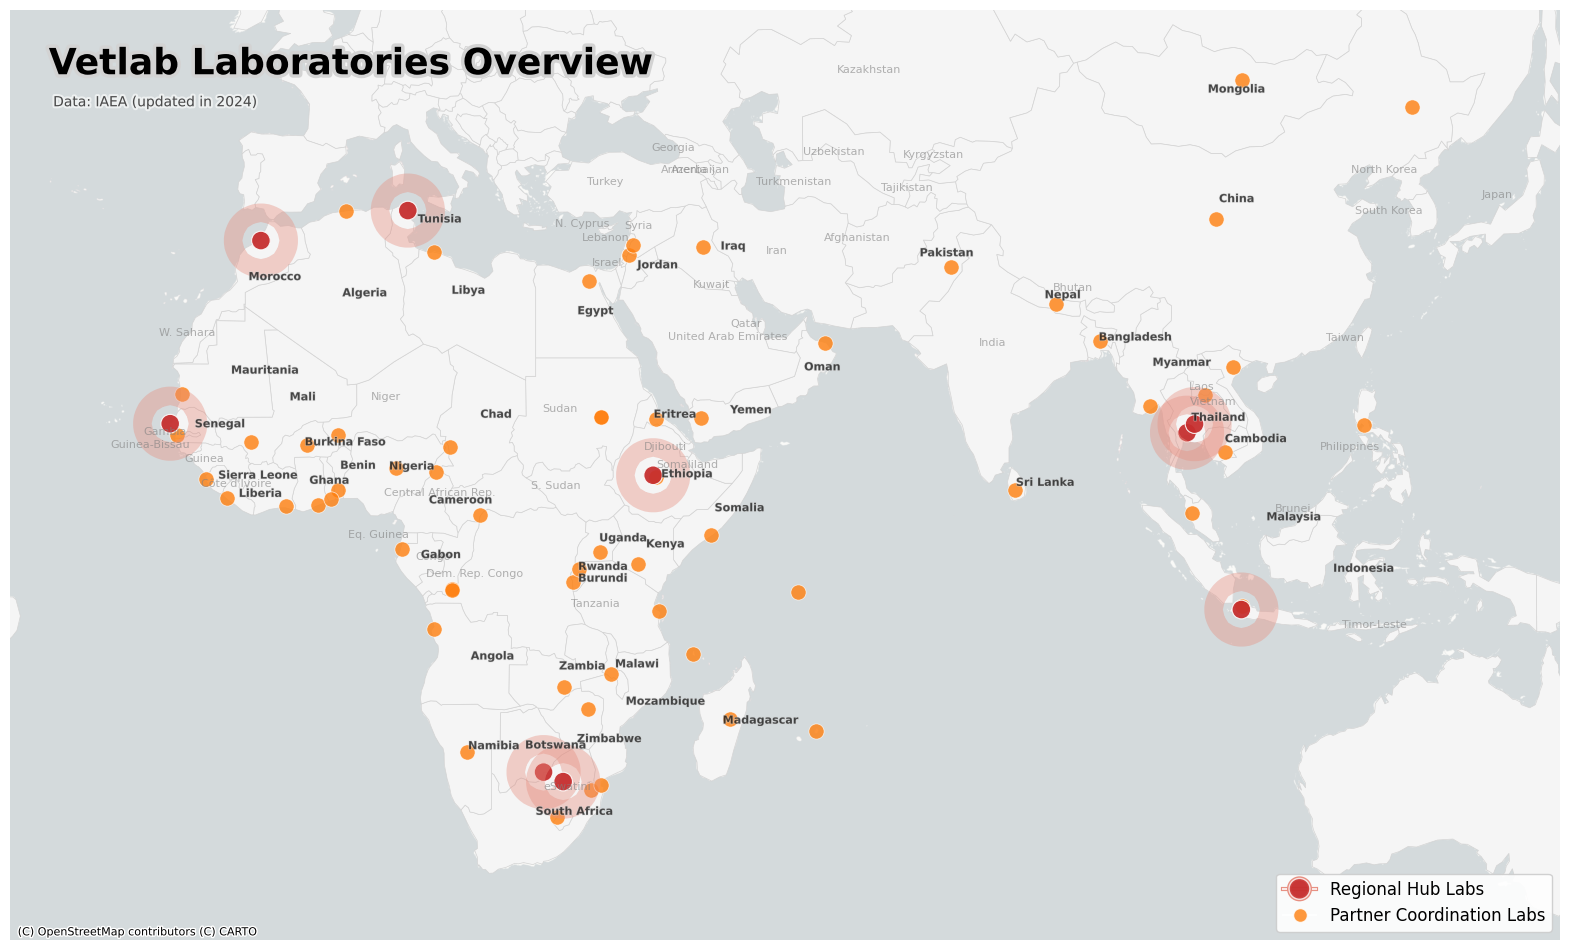

In [ ]:
# 导入库
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib import patheffects
import requests
from zipfile import ZipFile
from io import BytesIO
from shapely.geometry import box

# 下载并解压 Natural Earth 数据集
def download_and_extract_natural_earth(url, extract_to='/content/'):
    response = requests.get(url)
    if response.status_code == 200:
        with ZipFile(BytesIO(response.content)) as zip_ref:
            zip_ref.extractall(extract_to)
    else:
        print("Failed to download data. Please check the URL or try again later.")

# 下载 Natural Earth 数据集
url = 'https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip'
download_and_extract_natural_earth(url)

# 加载世界地图数据
world = gpd.read_file('/content/ne_110m_admin_0_countries.shp')

# 加载实验室数据
file_path = '/content/drive/MyDrive/data/VETLAB Members all.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# 过滤掉无效的坐标（即缺失或为0的坐标）
data = data[(data['Pl. Lat'] != 0) & (data['Pl. Lon'] != 0)]

# 将实验室数据转换为 GeoDataFrame，使用 'Pl. Lat' 和 'Pl. Lon'
labs_gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['Pl. Lon'], data['Pl. Lat']), crs="EPSG:4326")

# 转换实验室数据的投影以匹配地图的投影 (EPSG:3857)
labs_gdf = labs_gdf.to_crs(epsg=3857)

# 创建绘图对象，设置合理的显示范围
fig, ax = plt.subplots(figsize=(20, 15))
ax.set_xlim([-4000000, 16000000])
ax.set_ylim([-5000000, 7000000])

# 转换投影并绘制基础地图
world = world.to_crs(epsg=3857)
world.plot(ax=ax, color="whitesmoke", edgecolor="lightgrey", linewidth=0.5, zorder=1)

# 使用 CartoDB Positron 瓦片图层添加背景，但减少海洋的影响
ctx.add_basemap(ax, crs="EPSG:3857", source=ctx.providers.CartoDB.PositronNoLabels, zoom=5)

# 绘制实验室位置，区分 "Developed Lab" 和其他
for idx, row in labs_gdf.iterrows():
    x, y = row.geometry.x, row.geometry.y
    if row['Developed Lab'] == 1:
        # 已开发实验室 - 绿色标记，标记更大，添加阴影效果，强调影响力（表示 hub）
        ax.scatter(x, y, color='#C62E2E', s=180, alpha=0.9, edgecolor="white", linewidth=0.8, zorder=5,
                   path_effects=[patheffects.withStroke(linewidth=40, foreground="#E78F81", alpha=0.4)])
    else:
        # 未开发实验室 - 橙色标记，标记较小
        ax.scatter(x, y, color='#ff7f0e', s=120, alpha=0.8, edgecolor="white", linewidth=0.5, zorder=4)

# 存储已经标注的区域（以用于检测重叠）
labeled_boxes = []

# 添加国家名称标注，仅标注非洲和亚洲的国家
for idx, row in world.iterrows():
    country_name = row['NAME']
    if country_name in ["Lesotho", "Togo","Saudi Arabia"]:
        continue
    # 获取国家几何中心坐标
    x, y = row['geometry'].centroid.coords[0]

    # 手动调整特定国家的名称位置，防止重叠
    if country_name == "Tunisia":
        x += 200000
        y += 200000
    elif country_name == "Libya":
        x -= 300000
        y += 200000
    elif country_name == "Zimbabwe":
        y -= 300000
    elif country_name == "Pakistan":
        y += 300000
    elif country_name == "Bhutan":
        x -= 100000
        y += 200000
    elif country_name == "Eswatini":
        x += 200000
        y -= 200000
    elif country_name == "Botiswana":
        y -= 100000
    elif country_name == "Iraq":
        x += 300000

    # 创建国家标注的边界盒
    country_box = box(x - 50000, y - 50000, x + 50000, y + 50000)

    # 检查当前国家的边界盒是否与已有的标注重叠
    if any(country_box.intersects(existing_box) for existing_box in labeled_boxes):
        continue  # 如果重叠，跳过这个国家的标注

    # 将不重叠的国家边界盒添加到列表中
    labeled_boxes.append(country_box)

    # 判断国家是否在实验室数据的 'Country Name' 列中
    if country_name in labs_gdf['Country Name'].values:
        # 如果是实验室所在国家，标注为黑色并加粗
        ax.text(x, y, country_name, fontsize=8, ha='left', color="black", fontweight='bold', zorder=6, alpha=0.5,
                path_effects=[patheffects.withStroke(linewidth=1, foreground="lightgrey")])
    elif row['CONTINENT'] in ['Africa', 'Asia']:
        # 否则，标注为灰色
        ax.text(x, y, country_name, fontsize=8, ha='right', color="grey", zorder=5, alpha=0.6)

# 添加左上角的标题
ax.text(-3.5e6, 6.3e6, "Vetlab Laboratories Overview", fontsize=26, color='black', fontweight='bold', va='center', ha='left', zorder=11,
        path_effects=[patheffects.withStroke(linewidth=5, foreground="lightgrey")])

# 添加左下角的描述文本
#description_text = ("The distribution of veterinary labs across Africa and Asia.\n")
#ax.text(-3.5e6, 5.9e6, description_text, fontsize=10, color='black', va='top', ha='left', zorder=11)
#description_text = ("The red labs serve as regional hubs, exerting a significant influence.")
#ax.text(-3.5e6, 5.9e6, description_text, fontsize=10, color='black', va='top', ha='left', zorder=11)

#footer_text = ("Design: Yuetong Ma, 2024.\n" )
#ax.text(-3.9e6, -4.5e6, footer_text, fontsize=10, color='black', va='top', ha='left', zorder=11, alpha=0.6)
footer_text = (" Data: IAEA (updated in 2024)")
ax.text(-3.5e6, 5.9e6, footer_text, fontsize=10, color='black', va='top', ha='left', zorder=11, alpha=0.6,
        path_effects=[patheffects.withStroke(linewidth=3, foreground="white")])

# 添加图例
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Regional Hub Labs',
                          markerfacecolor='#C62E2E', markersize=15, alpha=0.8, path_effects=[patheffects.withStroke(linewidth=3, foreground="#E78F81")]),
                   Line2D([0], [0], marker='o', color='w', label='Partner Coordination Labs',
                          markerfacecolor='#ff7f0e', markersize=10, alpha=0.8)]
ax.legend(handles=legend_elements, loc='lower right', frameon=True, framealpha=0.9, fontsize=12, fancybox=True)

# 移除坐标轴
ax.set_axis_off()

# 显示图形并保存高清图片
plt.savefig('/content/drive/MyDrive/figures/Vetlabs_Overview_HighRes_02.png', dpi=300, bbox_inches='tight')
plt.show()


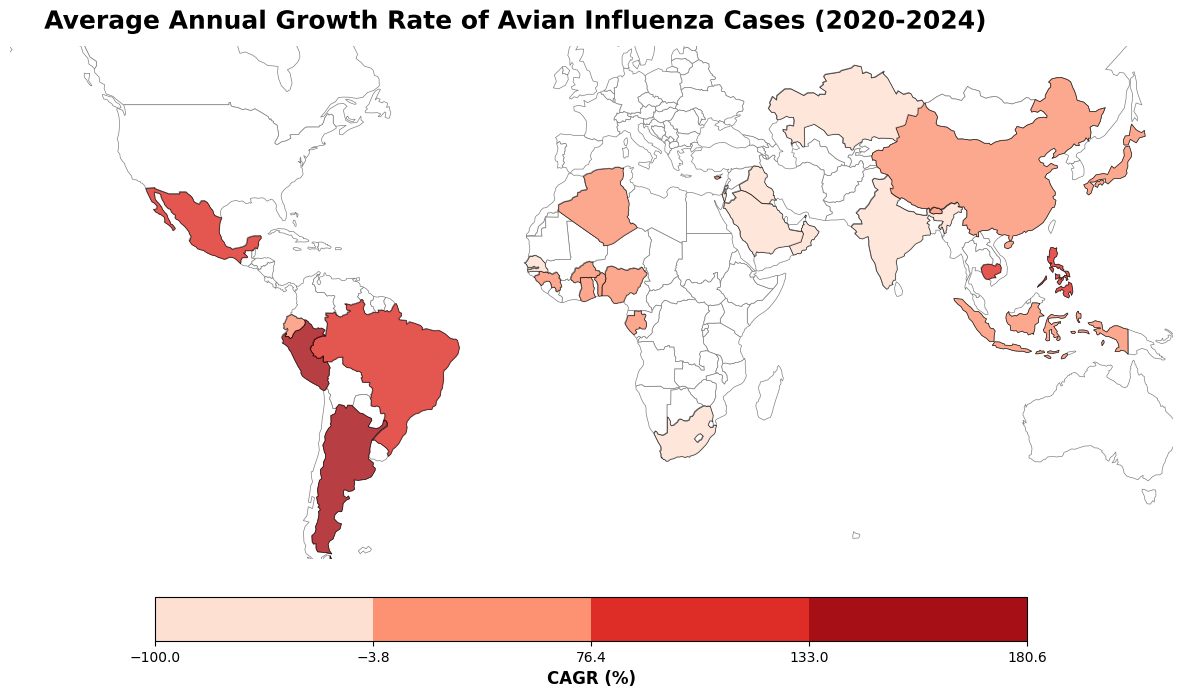

In [ ]:
# Import libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap
from matplotlib import patheffects
from zipfile import ZipFile
import requests
from io import BytesIO
import contextily as ctx  # for basemap tiles
from sklearn.cluster import KMeans
import numpy as np

# Download and extract Natural Earth dataset
def download_and_extract_natural_earth(url, extract_to='/content/'):
    response = requests.get(url)
    if response.status_code == 200:
        with ZipFile(BytesIO(response.content)) as zip_ref:
            zip_ref.extractall(extract_to)
    else:
        print("Download failed. Check the URL or try again later.")

# Download and load the map data
url = 'https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip'
download_and_extract_natural_earth(url)
world = gpd.read_file('/content/ne_110m_admin_0_countries.shp').to_crs(epsg=3857)

# Load and process avian influenza data
file_path = '/content/drive/MyDrive/data/AI Cases.xlsx'
data = pd.read_excel(file_path)

# Convert date format and create 'year' column
data['Report.date'] = pd.to_datetime(data['Report.date..dd.mm.yyyy.'], dayfirst=True, errors='coerce')
data['year'] = data['Report.date'].dt.year

# Filter data for avian influenza cases in Africa, Asia, and Latin America (excluding North America)
avian_data = data[(data['Disease'] == 'Influenza - Avian') &
                  ((data['Region'] == 'Africa') |
                   (data['Region'] == 'Asia') |
                   ((data['Region'] == 'Americas') & (data['Subregion'] != 'Northern America')))]
avian_data = avian_data.dropna(subset=['Latitude', 'Longitude'])

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(
    avian_data, geometry=gpd.points_from_xy(avian_data.Longitude, avian_data.Latitude), crs="EPSG:4326"
).to_crs(epsg=3857)

# Calculate CAGR
recent_years = [2020, 2021, 2022, 2023, 2024]
growth_data = gdf[gdf['year'].isin([2020, 2024])]
growth_data_grouped = growth_data.groupby(['Country', 'year']).size().unstack(fill_value=0)
growth_data_grouped['CAGR'] = ((growth_data_grouped[2024] / growth_data_grouped[2020].replace(0, 1)) ** (1/4) - 1) * 100

# Apply natural breaks (Jenks) to create bins for the color mapping
cagr_values = growth_data_grouped['CAGR'].values.reshape(-1, 1)
jenks_breaks = KMeans(n_clusters=5, random_state=42).fit(cagr_values).cluster_centers_
jenks_breaks = np.sort(jenks_breaks.flatten())

# Define color map with natural breaks
colors = ["#fee0d2", "#fc9272", "#de2d26", "#a50f15"]
cmap = ListedColormap(colors)

# Set normalization for the color mapping
norm = mcolors.BoundaryNorm(boundaries=jenks_breaks, ncolors=len(colors))

# Create the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.set_facecolor('#f0f0f0')  # Set the background to light grey for better contrast

# Plot the base world map
world.plot(ax=ax, color='white', edgecolor='grey', linewidth=0.5, zorder=1)

# Plot the CAGR data with natural breaks and shadow effect
for country, cagr in growth_data_grouped['CAGR'].items():
    country_geom = world[world['NAME'] == country]
    if not country_geom.empty:
        color = cmap(norm(cagr))
        country_geom.plot(ax=ax, color=color, edgecolor='black', linewidth=0.5, alpha=0.8, zorder=2)


# Set map limits and cropping
ax.set_xlim([-17000000, 17000000])
ax.set_ylim([-7000000, 8000000])

# Add title with shadow effect
title = ax.text(-1.6e7, 8.5e6, 'Average Annual Growth Rate of Avian Influenza Cases (2020-2024)', fontsize=18, fontweight='bold')
title.set_path_effects([patheffects.withStroke(linewidth=3, foreground="white")])

# Add legend to represent the categories
cbar = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar.set_array([])
colorbar = plt.colorbar(cbar, ax=ax, orientation='horizontal', pad=0.05, shrink=0.75)
colorbar.set_label('CAGR (%)', fontsize=12, fontweight='bold')
colorbar.ax.tick_params(labelsize=10)

# Hide axes
ax.axis('off')

plt.show()


In [ ]:
!pip install mapclassify
!pip install mapclassify --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.5 MB/s eta 0:00:00


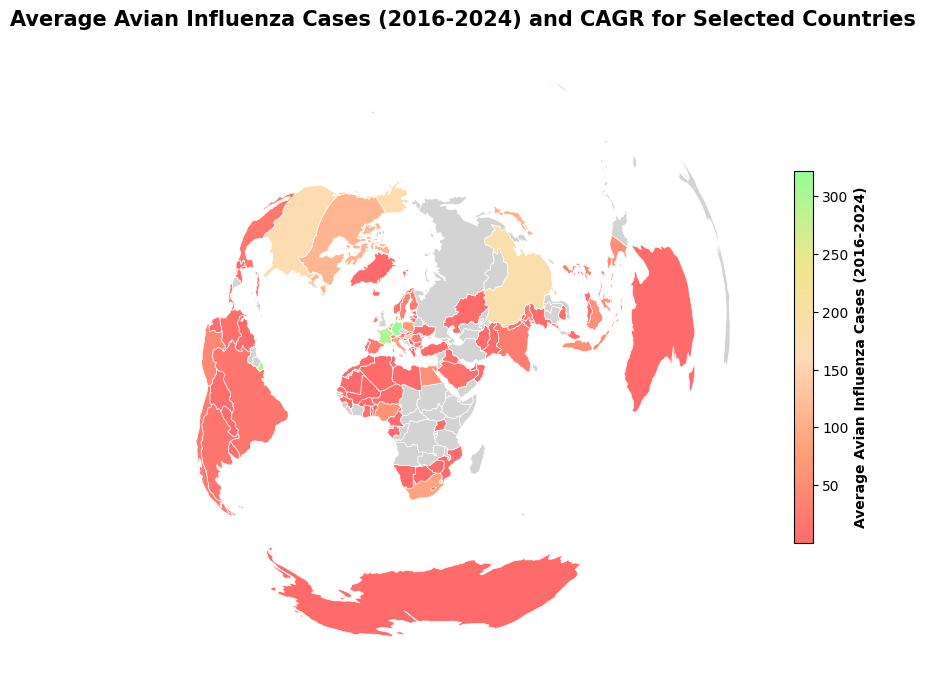

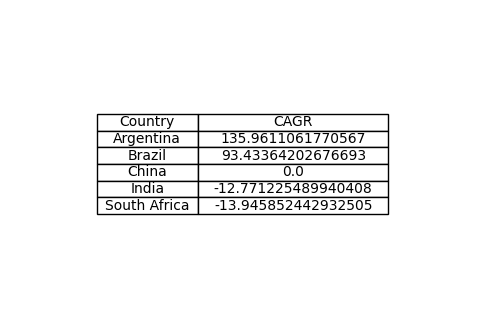

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from zipfile import ZipFile
import requests
from io import BytesIO

# Function to download and extract Natural Earth dataset
def download_and_extract_natural_earth(url, extract_to='/content/'):
    response = requests.get(url)
    if response.status_code == 200:
        with ZipFile(BytesIO(response.content)) as zip_ref:
            zip_ref.extractall(extract_to)
    else:
        print("Failed to download data. Please check the URL or try again later.")

# Download Natural Earth dataset
url = 'https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip'
download_and_extract_natural_earth(url)

# Load world map data
world = gpd.read_file('/content/ne_110m_admin_0_countries.shp')

# Set projection to Azimuthal Equidistant centered on Vienna
azimuthal_proj = "+proj=aeqd +lat_0=48.2082 +lon_0=16.3738"  # Center at Vienna
world = world.to_crs(azimuthal_proj)

# Load avian influenza data
data = pd.read_excel('/content/drive/MyDrive/data/AI Cases.xlsx')  # Ensure correct path
data['Report.date'] = pd.to_datetime(data['Report.date..dd.mm.yyyy.'], dayfirst=True, errors='coerce')
data['year'] = data['Report.date'].dt.year

# Filter data for the years 2016-2024
filtered_data = data[(data['year'] >= 2016) & (data['year'] <= 2024)]

# Calculate the average cases per country
average_cases = filtered_data.groupby('Country').size() / (2024 - 2016 + 1)
world = world.merge(average_cases.rename('Avg_Cases'), how='left', left_on='NAME', right_index=True)

# Color map for average cases
colors = ["#ff6b6b", "#ffa07a", "#ffdab9", "#f0e68c", "#98fb98"]
custom_cmap = LinearSegmentedColormap.from_list("custom_gradient", colors)
norm = plt.Normalize(vmin=world['Avg_Cases'].min(), vmax=world['Avg_Cases'].max())

# Calculate Compound Annual Growth Rate (CAGR) for selected countries
representative_countries = ['Argentina', 'Brazil', 'China', 'India', 'South Africa']
recent_years = [2020, 2024]
growth_data = filtered_data[filtered_data['year'].isin(recent_years)]
growth_data_grouped = growth_data.groupby(['Country', 'year']).size().unstack(fill_value=0)
growth_data_grouped['CAGR'] = ((growth_data_grouped[2024] / growth_data_grouped[2020].replace(0, 1)) ** (1/4) - 1) * 100
growth_df = growth_data_grouped.loc[representative_countries, ['CAGR']].reset_index()

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
world.plot(ax=ax, color=world['Avg_Cases'].map(lambda x: custom_cmap(norm(x)) if pd.notnull(x) else 'lightgrey'),
           edgecolor="white", linewidth=0.5)

# Add title mentioning average cases and CAGR
ax.set_title("Average Avian Influenza Cases (2016-2024) and CAGR for Selected Countries", fontsize=15, fontweight="bold")

# Add color bar for the average cases
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
cbar = plt.colorbar(sm, ax=ax, orientation="vertical", fraction=0.02, pad=0.04)
cbar.set_label("Average Avian Influenza Cases (2016-2024)", fontsize=10, fontweight='bold')

# Hide axis
ax.axis("off")

# Plot the table of CAGR for representative countries
fig_table, ax_table = plt.subplots(figsize=(6, 4))
ax_table.axis('tight')
ax_table.axis('off')
table = ax_table.table(cellText=growth_df.values, colLabels=growth_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([0, 1])

plt.show()



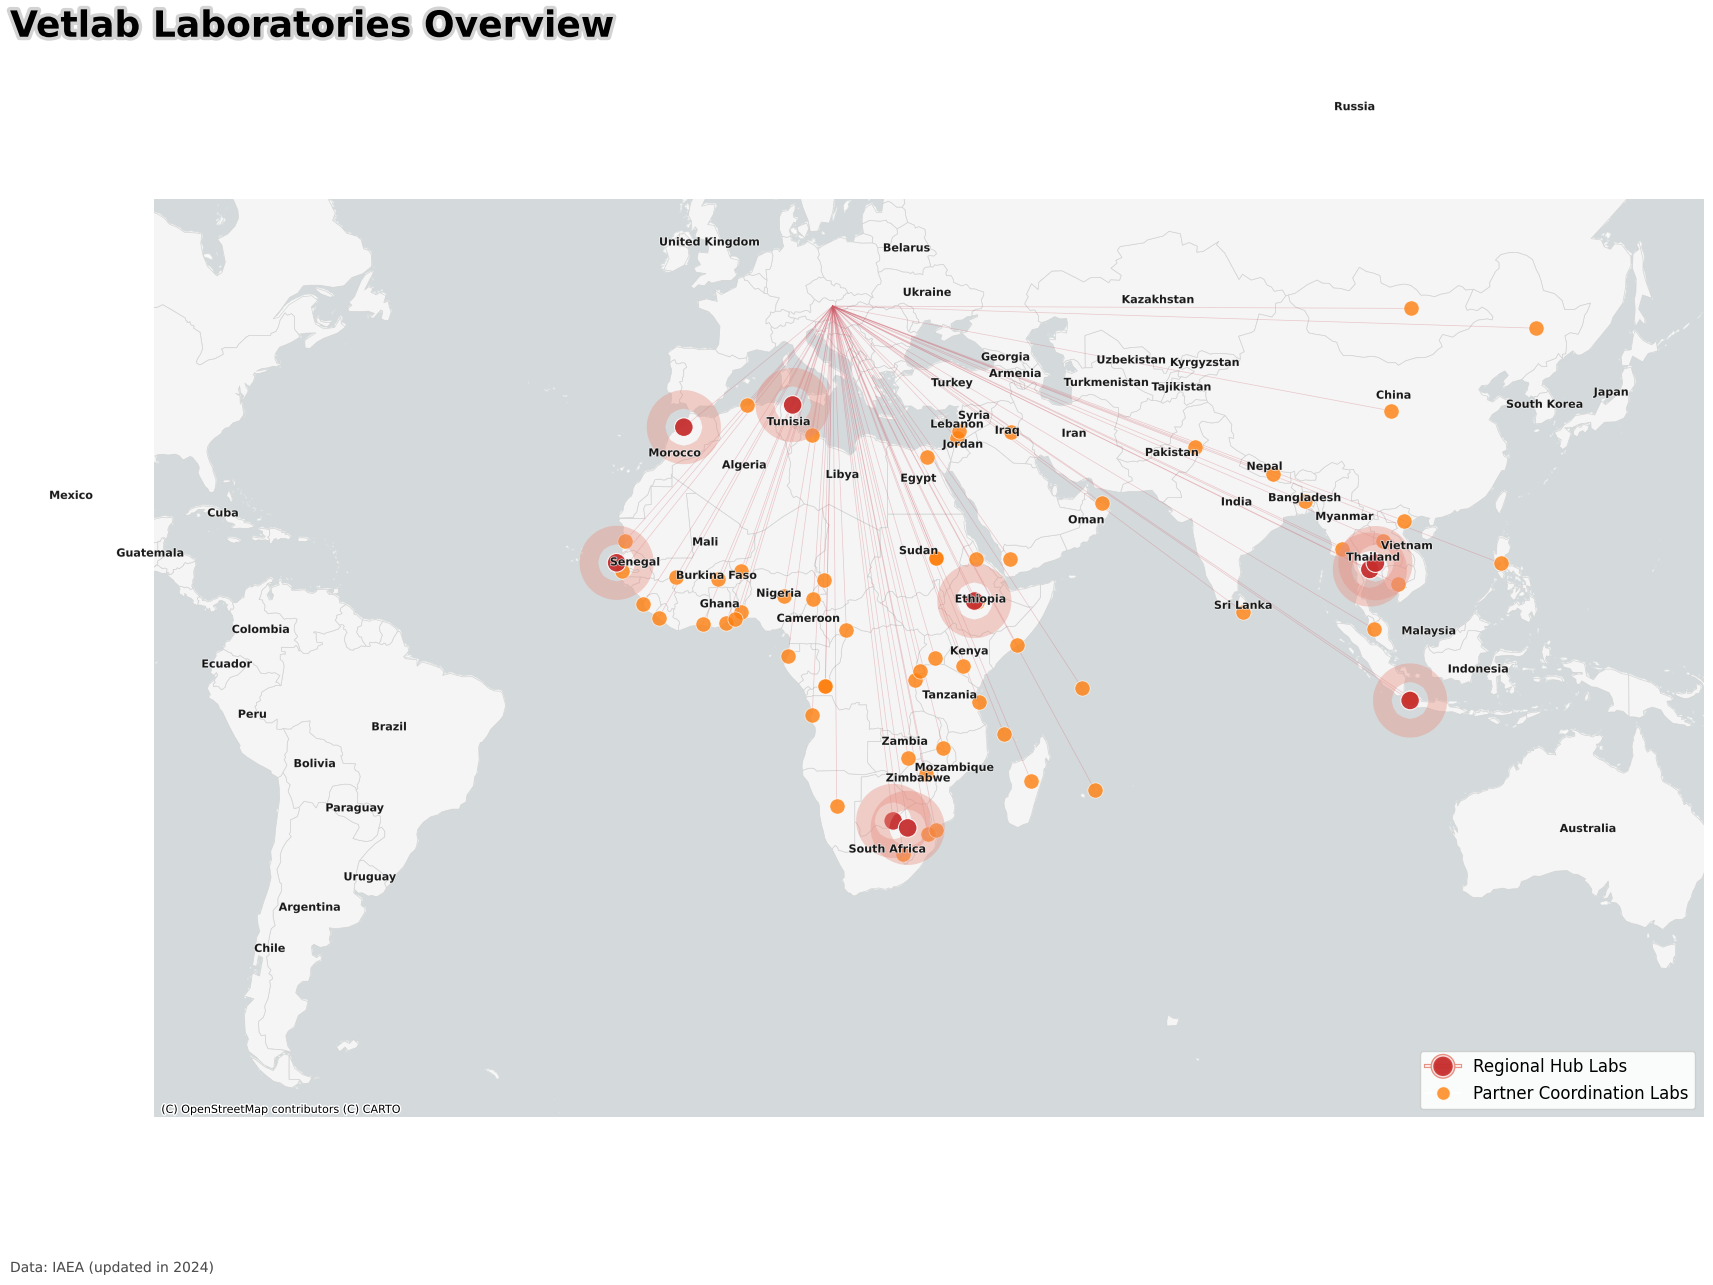

In [ ]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib import patheffects
import requests
from zipfile import ZipFile
from io import BytesIO
from shapely.geometry import box, Point

# Download and extract Natural Earth dataset
def download_and_extract_natural_earth(url, extract_to='/content/'):
    response = requests.get(url)
    if response.status_code == 200:
        with ZipFile(BytesIO(response.content)) as zip_ref:
            zip_ref.extractall(extract_to)
    else:
        print("Failed to download data. Please check the URL or try again later.")

# Download Natural Earth dataset
url = 'https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip'
download_and_extract_natural_earth(url)

# Load world map data
world = gpd.read_file('/content/ne_110m_admin_0_countries.shp')

# Load lab data
file_path = '/content/drive/MyDrive/data/VETLAB Members all.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Filter out invalid coordinates (i.e., missing or zero coordinates)
data = data[(data['Pl. Lat'] != 0) & (data['Pl. Lon'] != 0)]

# Convert lab data to GeoDataFrame
labs_gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['Pl. Lon'], data['Pl. Lat']), crs="EPSG:4326")

# Transform lab data to match map projection (EPSG:3857)
labs_gdf = labs_gdf.to_crs(epsg=3857)

# Define Vienna's coordinates (for lines)
vienna_point = Point(1829282.7, 6135268.4)  # Coordinates in EPSG:3857

# List of countries to label
countries_to_label = ["United States", "Mexico", "Guatemala", "China","Cuba", "Colombia", "Ecuador", "Peru", "Chile",
                      "Bolivia", "Paraguay", "Argentina", "Uruguay", "Brazil", "Morocco", "Algeria", "Tunisia", "Libya",
                      "Egypt", "Mali", "Burkina Faso", "Senegal", "Nigeria", "Ghana", "Cameroon", "Sudan", "Ethiopia",
                      "Kenya", "Tanzania", "Zambia", "Zimbabwe", "Mozambique", "South Africa", "United Kingdom",
                      "Belarus", "Russia", "Ukraine", "Turkey", "Georgia", "Armenia", "Uzbekistan",
                      "Kazakhstan", "Kyrgyzstan", "Tajikistan", "Turkmenistan", "Iran", "Iraq", "Syria", "Lebanon",
                      "Jordan", "UAE", "Oman", "Pakistan", "India", "Sri Lanka", "Nepal", "Bangladesh", "Myanmar",
                      "Thailand", "Vietnam", "Malaysia", "Indonesia", "South Korea", "Japan", "Australia"]

# Plot map
fig, ax = plt.subplots(figsize=(20, 15))
ax.set_xlim([-10000000, 17000000])
ax.set_ylim([-8000000, 8000000])

# Transform projection and plot base map
world = world.to_crs(epsg=3857)
world.plot(ax=ax, color="whitesmoke", edgecolor="lightgrey", linewidth=0.5, zorder=1)

# Add background map layer
ctx.add_basemap(ax, crs="EPSG:3857", source=ctx.providers.CartoDB.PositronNoLabels, zoom=5)

# Plot labs with different colors and sizes for types
for idx, row in labs_gdf.iterrows():
    x, y = row.geometry.x, row.geometry.y
    if row['Developed Lab'] == 1:
        # Regional Hub Labs - larger, red marker with shadow effect
        ax.scatter(x, y, color='#C62E2E', s=180, alpha=0.9, edgecolor="white", linewidth=0.8, zorder=5,
                   path_effects=[patheffects.withStroke(linewidth=40, foreground="#E78F81", alpha=0.4)])
    else:
        # Partner Coordination Labs - smaller, orange marker
        ax.scatter(x, y, color='#ff7f0e', s=120, alpha=0.8, edgecolor="white", linewidth=0.5, zorder=4)

    # Draw light line from lab to Vienna
    ax.plot([x, vienna_point.x], [y, vienna_point.y], color='#CE5A67', linestyle="-", linewidth=0.5, alpha=0.3, zorder=2)

# Label specified countries
for idx, row in world.iterrows():
    country_name = row['NAME']
    if country_name in countries_to_label:
        x, y = row['geometry'].centroid.coords[0]
        ax.text(x, y, country_name, fontsize=8, ha='center', color="black", fontweight='bold', zorder=6, alpha=0.8,
                path_effects=[patheffects.withStroke(linewidth=1, foreground="whitesmoke")])

# Add title and footer text
ax.text(-1.25e7, 1.1e7, "Vetlab Laboratories Overview", fontsize=26, color='black', fontweight='bold', va='center', ha='left', zorder=11,
        path_effects=[patheffects.withStroke(linewidth=5, foreground="lightgrey")])
footer_text = "Data: IAEA (updated in 2024)"
ax.text(-1.25e7, -1.05e7, footer_text, fontsize=10, color='black', va='top', ha='left', zorder=11, alpha=0.6,
        path_effects=[patheffects.withStroke(linewidth=3, foreground="white")])

# Add legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Regional Hub Labs',
                          markerfacecolor='#C62E2E', markersize=15, alpha=0.8, path_effects=[patheffects.withStroke(linewidth=3, foreground="#E78F81")]),
                   Line2D([0], [0], marker='o', color='w', label='Partner Coordination Labs',
                          markerfacecolor='#ff7f0e', markersize=10, alpha=0.8)]
ax.legend(handles=legend_elements, loc='lower right', frameon=True, framealpha=0.9, fontsize=12, fancybox=True)

# Remove axis
ax.set_axis_off()

# Save and show the map
plt.savefig('/content/drive/MyDrive/figures/Vetlabs_Overview_HighRes_with_Lines_and_Country_Labels.png', dpi=300, bbox_inches='tight')
plt.show()



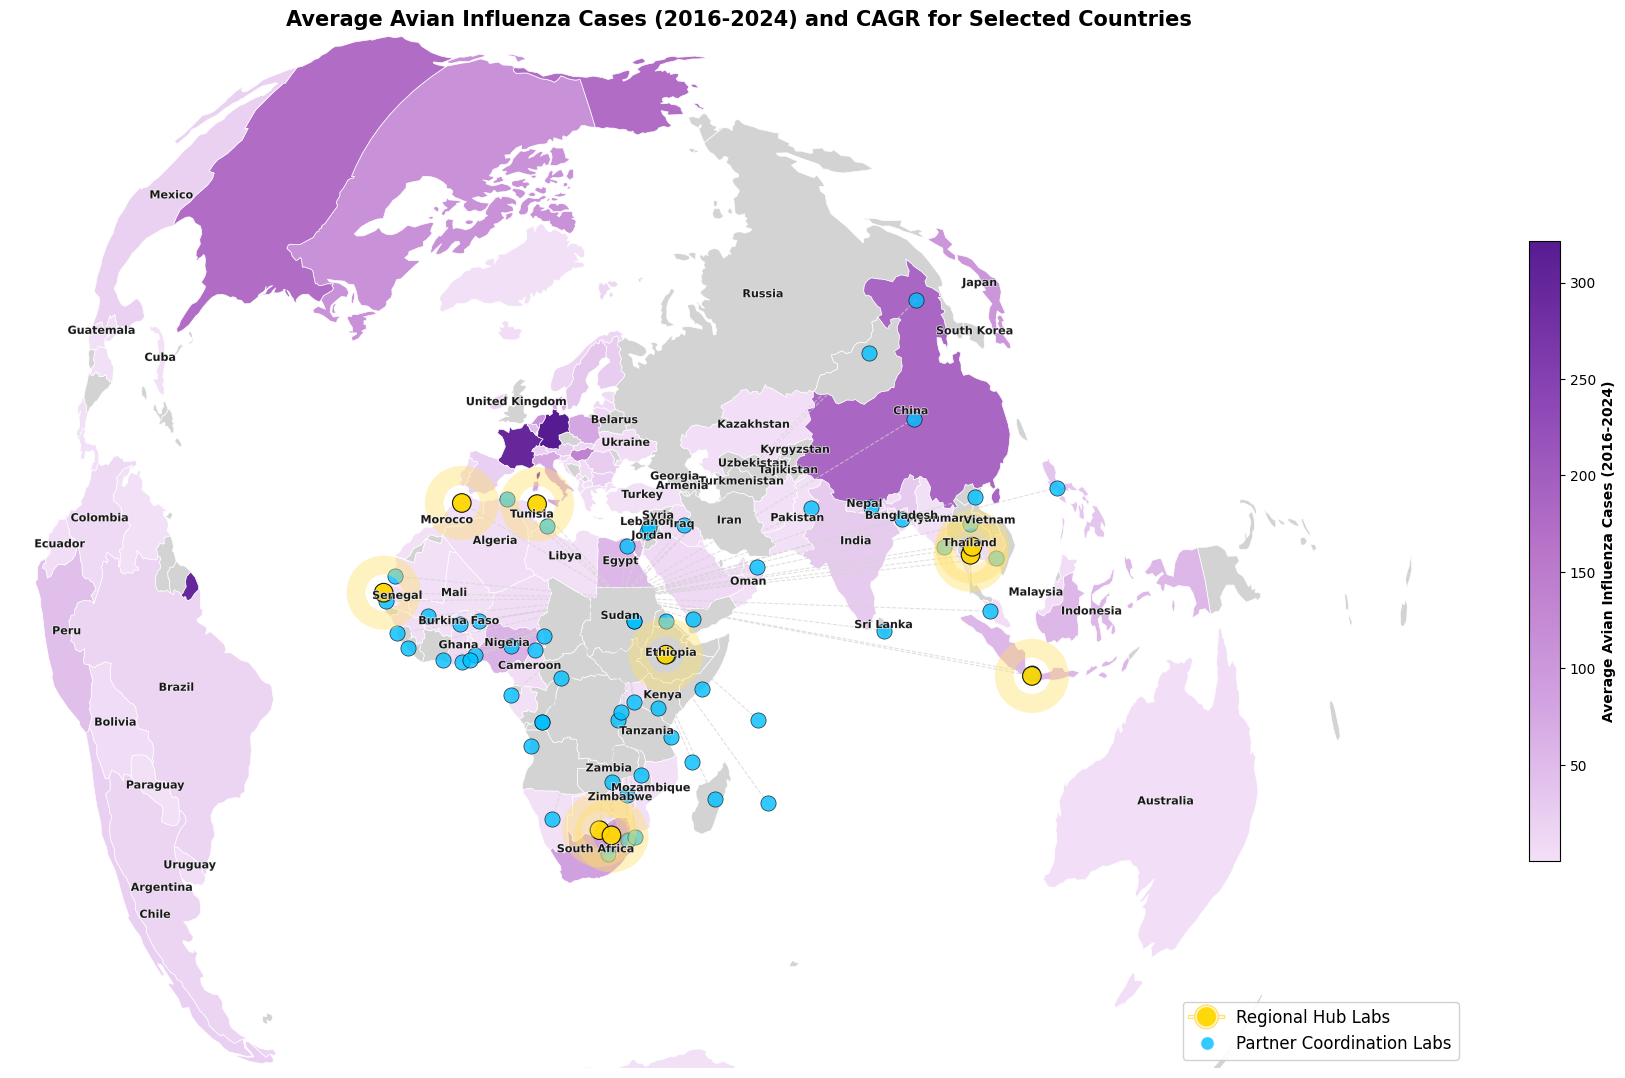

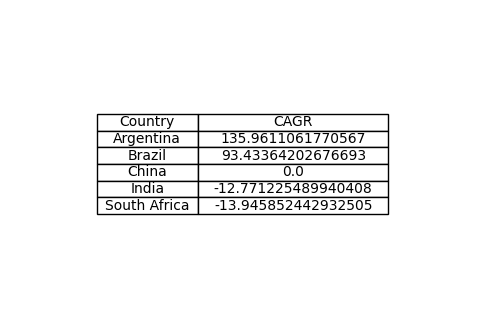

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D
from matplotlib import patheffects
from zipfile import ZipFile
import requests
from io import BytesIO

# Function to download and extract Natural Earth dataset
def download_and_extract_natural_earth(url, extract_to='/content/'):
    response = requests.get(url)
    if response.status_code == 200:
        with ZipFile(BytesIO(response.content)) as zip_ref:
            zip_ref.extractall(extract_to)
    else:
        print("Failed to download data. Please check the URL or try again later.")

# Download Natural Earth dataset
url = 'https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip'
download_and_extract_natural_earth(url)

# Load world map data
world = gpd.read_file('/content/ne_110m_admin_0_countries.shp')

# Adjust projection to reduce distortion and position Australia near the edge
azimuthal_proj = "+proj=aeqd +lat_0=20 +lon_0=30"  # Center adjusted for optimal balance
world = world.to_crs(azimuthal_proj)

# Load avian influenza data
data = pd.read_excel('/content/drive/MyDrive/data/AI Cases.xlsx')  # Ensure correct path
data['Report.date'] = pd.to_datetime(data['Report.date..dd.mm.yyyy.'], dayfirst=True, errors='coerce')
data['year'] = data['Report.date'].dt.year

# Filter data for the years 2016-2024
filtered_data = data[(data['year'] >= 2016) & (data['year'] <= 2024)]

# Calculate the average cases per country
average_cases = filtered_data.groupby('Country').size() / (2024 - 2016 + 1)
world = world.merge(average_cases.rename('Avg_Cases'), how='left', left_on='NAME', right_index=True)

# Warm purple gradient color map for average cases
colors = ["#f2e0f7", "#d3a3e1", "#b875c9", "#8b45b5", "#571b91"]  # Purple gradient
custom_cmap = LinearSegmentedColormap.from_list("custom_gradient", colors)
norm = plt.Normalize(vmin=world['Avg_Cases'].min(), vmax=world['Avg_Cases'].max())

# Load lab data
lab_file_path = '/content/drive/MyDrive/data/VETLAB Members all.xlsx'
lab_data = pd.read_excel(lab_file_path, sheet_name='Sheet1')
lab_data = lab_data[(lab_data['Pl. Lat'] != 0) & (lab_data['Pl. Lon'] != 0)]  # Filter valid coordinates

# Convert lab data to GeoDataFrame and set projection
labs_gdf = gpd.GeoDataFrame(lab_data, geometry=gpd.points_from_xy(lab_data['Pl. Lon'], lab_data['Pl. Lat']), crs="EPSG:4326")
labs_gdf = labs_gdf.to_crs(azimuthal_proj)

# Define Vienna's approximate new location in the adjusted projection
vienna_x, vienna_y = 0, 0  # Adjusted projection center

# List of countries to label
countries_to_label = ["United States", "Mexico", "Guatemala", "China", "Cuba", "Colombia", "Ecuador", "Peru", "Chile",
                      "Bolivia", "Paraguay", "Argentina", "Uruguay", "Brazil", "Morocco", "Algeria", "Tunisia", "Libya",
                      "Egypt", "Mali", "Burkina Faso", "Senegal", "Nigeria", "Ghana", "Cameroon", "Sudan", "Ethiopia",
                      "Kenya", "Tanzania", "Zambia", "Zimbabwe", "Mozambique", "South Africa", "United Kingdom",
                      "Belarus", "Russia", "Ukraine", "Turkey", "Georgia", "Armenia", "Uzbekistan",
                      "Kazakhstan", "Kyrgyzstan", "Tajikistan", "Turkmenistan", "Iran", "Iraq", "Syria", "Lebanon",
                      "Jordan", "UAE", "Oman", "Pakistan", "India", "Sri Lanka", "Nepal", "Bangladesh", "Myanmar",
                      "Thailand", "Vietnam", "Malaysia", "Indonesia", "South Korea", "Japan", "Australia"]

# Plot map with adjusted projection and zoom level
fig, ax = plt.subplots(figsize=(20, 15))
ax.set_xlim([-13000000, 18000000])
ax.set_ylim([-10000000, 12000000])

# Plot the map with color based on average cases
world.plot(ax=ax, color=world['Avg_Cases'].map(lambda x: custom_cmap(norm(x)) if pd.notnull(x) else 'lightgrey'),
           edgecolor="white", linewidth=0.5)

# Add title mentioning average cases and CAGR
ax.set_title("Average Avian Influenza Cases (2016-2024) and CAGR for Selected Countries", fontsize=15, fontweight="bold")

# Add color bar for the average cases
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
cbar = plt.colorbar(sm, ax=ax, orientation="vertical", fraction=0.02, pad=0.04)
cbar.set_label("Average Avian Influenza Cases (2016-2024)", fontsize=10, fontweight='bold')

# Hide axis
ax.axis("off")

# Plot labs with high-contrast colors for visibility and lines to Vienna
for idx, row in labs_gdf.iterrows():
    x, y = row.geometry.x, row.geometry.y
    if row['Developed Lab'] == 1:
        # Regional Hub Labs - larger, bright yellow marker with shadow effect
        ax.scatter(x, y, color='#FFD700', s=180, alpha=0.9, edgecolor="black", linewidth=0.8, zorder=5,
                   path_effects=[patheffects.withStroke(linewidth=40, foreground="#FFE066", alpha=0.4)])
    else:
        # Partner Coordination Labs - smaller, cyan marker
        ax.scatter(x, y, color='#00BFFF', s=120, alpha=0.8, edgecolor="black", linewidth=0.5, zorder=4)

    # Draw light line from lab to Vienna
    ax.plot([x, vienna_x], [y, vienna_y], color="lightgrey", linestyle="--", linewidth=0.8, alpha=0.7, zorder=2)

# Label specified countries
for idx, row in world.iterrows():
    country_name = row['NAME']
    if country_name in countries_to_label:
        x, y = row['geometry'].centroid.coords[0]
        ax.text(x, y, country_name, fontsize=8, ha='center', color="black", fontweight='bold', zorder=6, alpha=0.8,
                path_effects=[patheffects.withStroke(linewidth=1, foreground="whitesmoke")])

# Add legend for labs
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Regional Hub Labs',
           markerfacecolor='#FFD700', markersize=15, alpha=0.8,
           path_effects=[patheffects.withStroke(linewidth=3, foreground="#FFE066")]),
    Line2D([0], [0], marker='o', color='w', label='Partner Coordination Labs',
           markerfacecolor='#00BFFF', markersize=10, alpha=0.8)
]
ax.legend(handles=legend_elements, loc='lower right', frameon=True, framealpha=0.9, fontsize=12, fancybox=True)
plt.savefig('/content/drive/MyDrive/figures/Vetlabs_Overview_HighRes_with_Lines_and_Country_Labels1.png', dpi=300, bbox_inches='tight')
plt.show()


# Plot the table of CAGR for representative countries
fig_table, ax_table = plt.subplots(figsize=(6, 4))
ax_table.axis('tight')
ax_table.axis('off')
table = ax_table.table(cellText=growth_df.values, colLabels=growth_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([0, 1])

plt.show()



In [ ]:
from pyproj import Proj, transform

# Define the original geographic coordinates of Vienna (latitude and longitude)
vienna_lat, vienna_lon = 48.2082, 16.3738

# Define the original and target projections
proj_geo = Proj(proj="latlong", datum="WGS84")  # Original geographic coordinates
proj_aeqd = Proj("+proj=aeqd +lat_0=10 +lon_0=20")  # Adjusted Azimuthal Equidistant projection

# Transform Vienna's coordinates to the adjusted projection
vienna_x, vienna_y = transform(proj_geo, proj_aeqd, vienna_lon, vienna_lat)
print("Vienna's coordinates in the adjusted projection:", vienna_x, vienna_y)


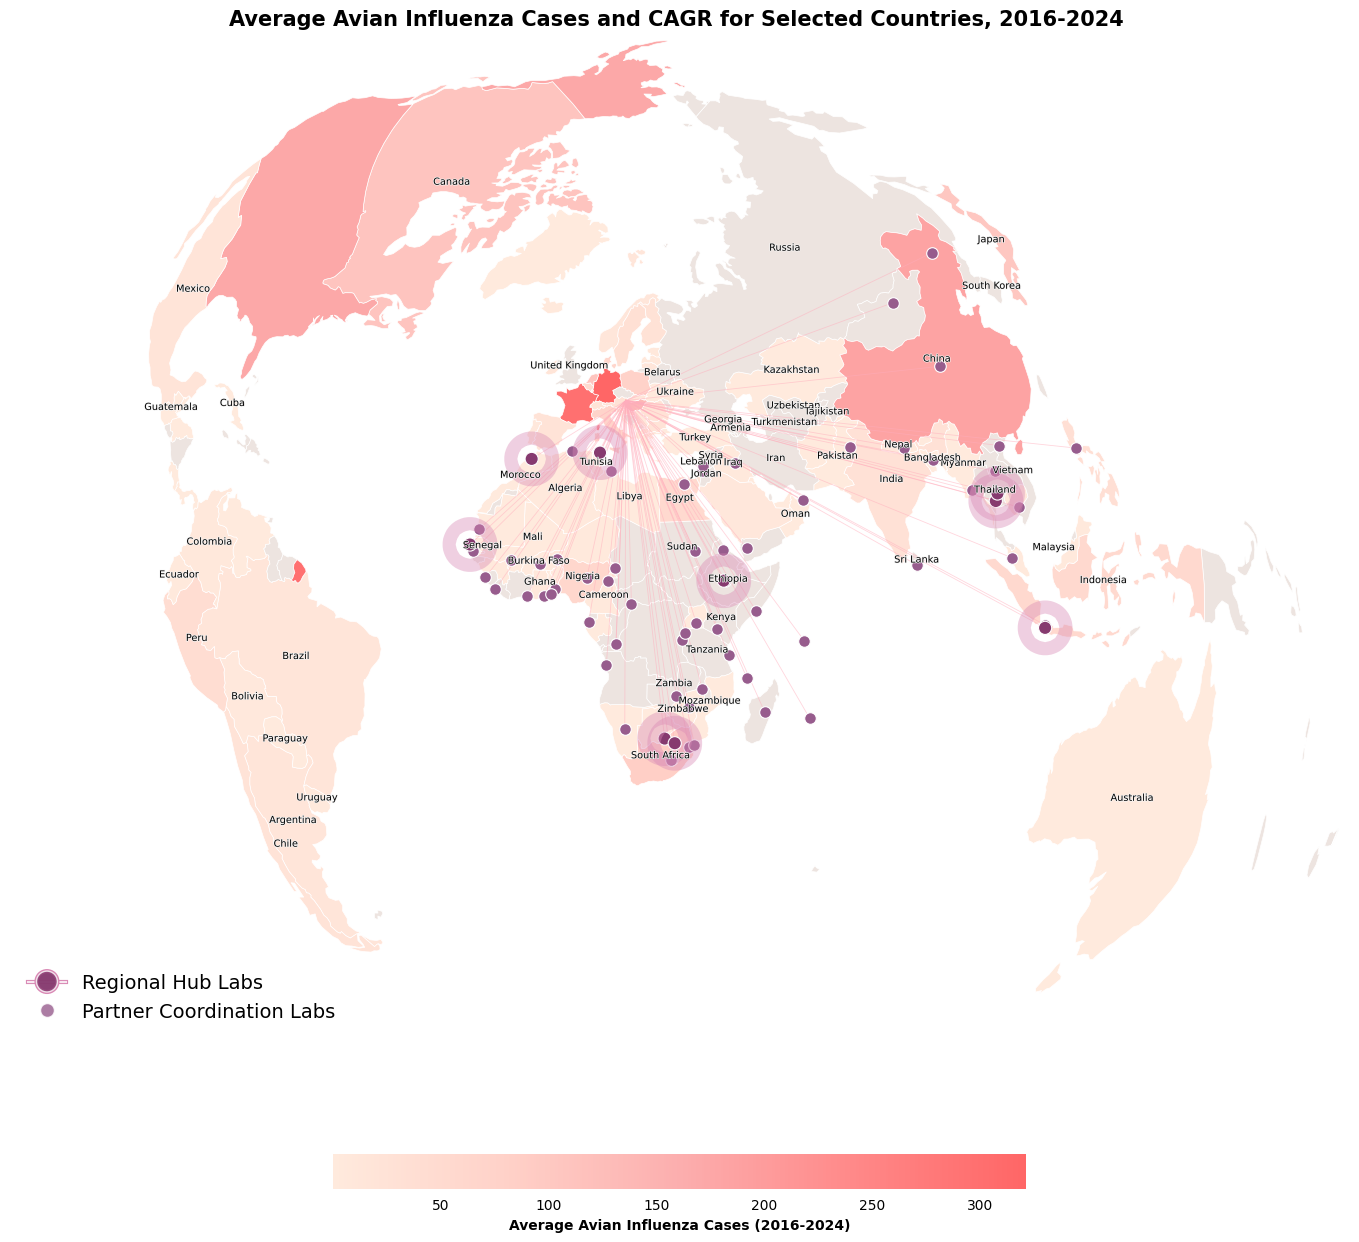

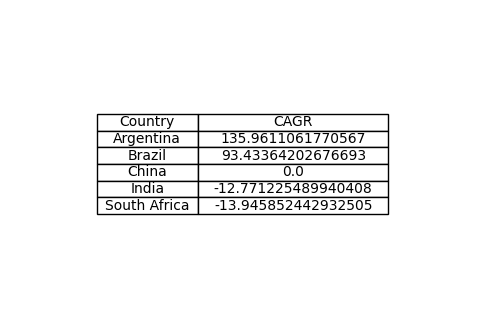

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D
from matplotlib import patheffects
from zipfile import ZipFile
import requests
from io import BytesIO

# Function to download and extract Natural Earth dataset
def download_and_extract_natural_earth(url, extract_to='/content/'):
    response = requests.get(url)
    if response.status_code == 200:
        with ZipFile(BytesIO(response.content)) as zip_ref:
            zip_ref.extractall(extract_to)
    else:
        print("Failed to download data. Please check the URL or try again later.")

# Download Natural Earth dataset
url = 'https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip'
download_and_extract_natural_earth(url)

# Load world map data
world = gpd.read_file('/content/ne_110m_admin_0_countries.shp')

# Remove Antarctica and small islands from the dataset
world = world[world['NAME'] != 'Antarctica']

# Filter out small polygons by setting a minimum area threshold
#world = world[world.geometry.area > 1e5]

# Adjust projection to reduce distortion and focus on central landmass
azimuthal_proj = "+proj=aeqd +lat_0=10 +lon_0=20"  # Center adjusted for central landmass
world = world.to_crs(azimuthal_proj)

# Load avian influenza data
data = pd.read_excel('/content/drive/MyDrive/data/AI Cases.xlsx')  # Ensure correct path
data['Report.date'] = pd.to_datetime(data['Report.date..dd.mm.yyyy.'], dayfirst=True, errors='coerce')
data['year'] = data['Report.date'].dt.year

# Filter data for the years 2016-2024
filtered_data = data[(data['year'] >= 2016) & (data['year'] <= 2024)]

# Calculate the average cases per country
average_cases = filtered_data.groupby('Country').size() / (2024 - 2016 + 1)
world = world.merge(average_cases.rename('Avg_Cases'), how='left', left_on='NAME', right_index=True)

# Warm color gradient for average cases
colors = ["#FFEADD", "#FFD1C8", "#FCAeAE", "#FF8989", "#FF6666"]  # Warm color gradient
custom_cmap = LinearSegmentedColormap.from_list("custom_gradient", colors)
norm = plt.Normalize(vmin=world['Avg_Cases'].min(), vmax=world['Avg_Cases'].max())

# Load lab data
lab_file_path = '/content/drive/MyDrive/data/VETLAB Members all.xlsx'
lab_data = pd.read_excel(lab_file_path, sheet_name='Sheet1')
lab_data = lab_data[(lab_data['Pl. Lat'] != 0) & (lab_data['Pl. Lon'] != 0)]  # Filter valid coordinates

# Convert lab data to GeoDataFrame and set projection
labs_gdf = gpd.GeoDataFrame(lab_data, geometry=gpd.points_from_xy(lab_data['Pl. Lon'], lab_data['Pl. Lat']), crs="EPSG:4326")
labs_gdf = labs_gdf.to_crs(azimuthal_proj)

# Define Vienna's approximate new location in the adjusted projection
vienna_x, vienna_y = -290418, 4239396  # Adjusted projection center for Vienna

# List of countries to label
countries_to_label = ["Canada","United States", "Mexico", "Guatemala", "China", "Cuba", "Colombia", "Ecuador", "Peru", "Chile",
                      "Bolivia", "Paraguay", "Argentina", "Uruguay", "Brazil", "Morocco", "Algeria", "Tunisia", "Libya",
                      "Egypt", "Mali", "Burkina Faso", "Senegal", "Nigeria", "Ghana", "Cameroon", "Sudan", "Ethiopia",
                      "Kenya", "Tanzania", "Zambia", "Zimbabwe", "Mozambique", "South Africa", "United Kingdom",
                      "Belarus", "Russia", "Ukraine", "Turkey", "Georgia", "Armenia", "Uzbekistan",
                      "Kazakhstan", "Tajikistan", "Turkmenistan", "Iran", "Iraq", "Syria", "Lebanon",
                      "Jordan", "UAE", "Oman", "Pakistan", "India", "Sri Lanka", "Nepal", "Bangladesh", "Myanmar",
                      "Thailand", "Vietnam", "Malaysia", "Indonesia", "South Korea", "Japan", "Australia"]

# Plot map with adjusted projection and limited focus on central landmass
fig, ax = plt.subplots(figsize=(20, 15))
ax.set_xlim([-15000000, 17000000])   # Custom zoom to show central landmass only
ax.set_ylim([-11000000, 13000000])

# Plot the map with color based on average cases
world.plot(ax=ax, color=world['Avg_Cases'].map(lambda x: custom_cmap(norm(x)) if pd.notnull(x) else '#EDE4E0'),
           edgecolor="white", linewidth=0.5)

# Add title mentioning average cases and CAGR
ax.set_title("Average Avian Influenza Cases and CAGR for Selected Countries, 2016-2024 ", fontsize=15, fontweight="bold")

# Add color bar for the average cases with improved aesthetics
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)

# Horizontal color bar without a border and with triangular end caps
cbar = plt.colorbar(sm, ax=ax, orientation="horizontal", fraction=0.03, pad=0.1)
cbar.set_label("Average Avian Influenza Cases (2016-2024)", fontsize=10, fontweight='bold')

# Remove the color bar's border
cbar.outline.set_visible(False)

# Triangular end caps
# Set the minimum and maximum values with triangular shapes
cbar.ax.minorticks_on()
cbar.ax.tick_params(which="both", width=0)  # Hide tick marks for cleaner look

# Hide axis
ax.axis("off")

# Plot labs with high-contrast colors for visibility and solid lines to Vienna
for idx, row in labs_gdf.iterrows():
    x, y = row.geometry.x, row.geometry.y
    if row['Developed Lab'] == 1:
        # Regional Hub Labs - larger, bright orange marker with shadow effect
        ax.scatter(x, y, color='#863A6F', s=90, alpha=1, edgecolor="white", linewidth=0.8, zorder=5,
                   path_effects=[patheffects.withStroke(linewidth=30, foreground="#D989B5", alpha=0.4)])
    else:
        # Partner Coordination Labs - smaller, yellow marker
        ax.scatter(x, y, color='#975C8D', s=70, alpha=1, edgecolor="white", linewidth=0.8, zorder=4)

    # Draw solid line from lab to Vienna
    ax.plot([x, vienna_x], [y, vienna_y], color='#FFADBC', linestyle="-", linewidth=0.6, alpha=0.5, zorder=2)

# Label specified countries
for idx, row in world.iterrows():
    country_name = row['NAME']
    if country_name in countries_to_label:
        x, y = row['geometry'].centroid.coords[0]
        ax.text(x, y, country_name, fontsize=7, ha='center', color="black", fontweight='light', zorder=6, alpha=1,
                path_effects=[patheffects.withStroke(linewidth=1, foreground="whitesmoke")])

# Add legend for labs without a border and with customized font
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Regional Hub Labs',
           markerfacecolor='#863A6F', markersize=15, alpha=0.8,
           path_effects=[patheffects.withStroke(linewidth=3, foreground="#D989B5")]),
    Line2D([0], [0], marker='o', color='w', label='Partner Coordination Labs',
           markerfacecolor='#975C8D', markersize=10, alpha=0.8)
]
ax.legend(handles=legend_elements, loc='lower left', frameon=False, prop={'size': 14, 'weight': 'light'}, fancybox=True)
plt.savefig('/content/drive/MyDrive/figures/Vetlabs_Overview_HighRes_with_AAI_02.png', dpi=300, bbox_inches='tight')
plt.show()


# Plot the table of CAGR for representative countries
fig_table, ax_table = plt.subplots(figsize=(6, 4))
ax_table.axis('tight')
ax_table.axis('off')
table = ax_table.table(cellText=growth_df.values, colLabels=growth_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([0, 1])

plt.show()




In [ ]:
!pip install ace_tools

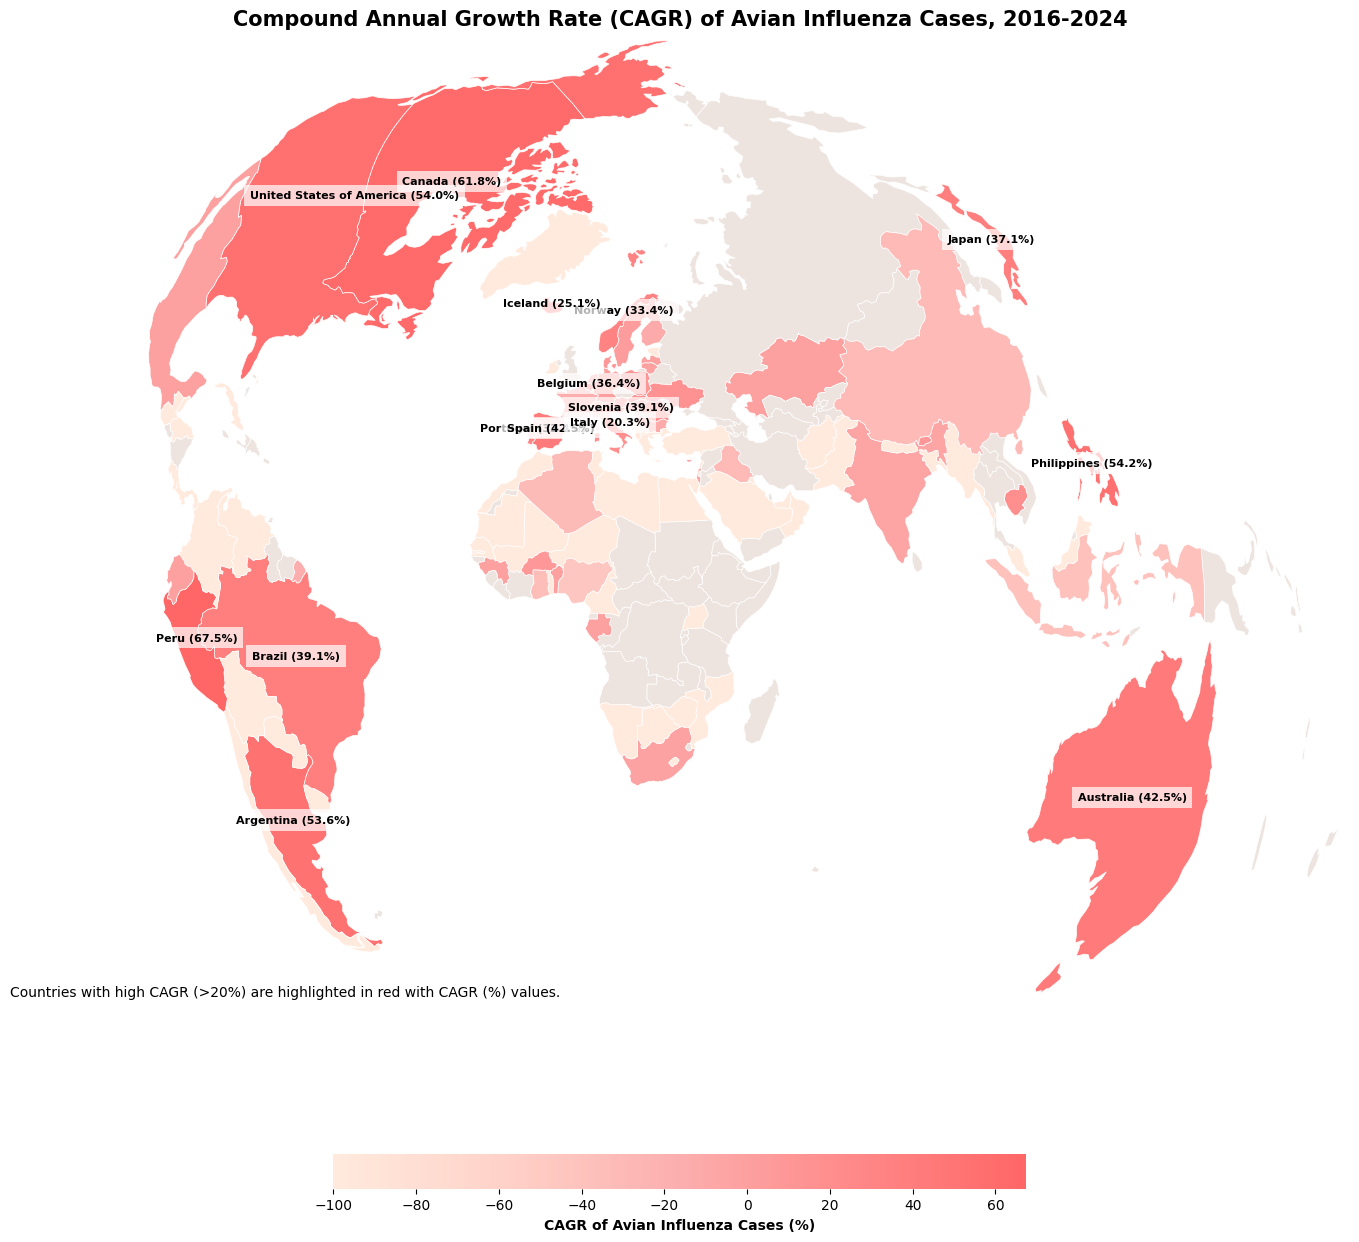

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from zipfile import ZipFile
import requests
from io import BytesIO

# Function to download and extract Natural Earth dataset
def download_and_extract_natural_earth(url, extract_to='/content/'):
    response = requests.get(url)
    if response.status_code == 200:
        with ZipFile(BytesIO(response.content)) as zip_ref:
            zip_ref.extractall(extract_to)
    else:
        print("Failed to download data. Please check the URL or try again later.")

# Download Natural Earth dataset
url = 'https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip'
download_and_extract_natural_earth(url)

# Load world map data
world = gpd.read_file('/content/ne_110m_admin_0_countries.shp')

# Remove Antarctica from the dataset
world = world[world['NAME'] != 'Antarctica']

# Adjust projection to reduce distortion and focus on central landmass
azimuthal_proj = "+proj=aeqd +lat_0=10 +lon_0=20"
world = world.to_crs(azimuthal_proj)

# Load avian influenza data
data = pd.read_excel('/content/drive/MyDrive/data/AI Cases.xlsx')
data['Report.date'] = pd.to_datetime(data['Report.date..dd.mm.yyyy.'], dayfirst=True, errors='coerce')
data['year'] = data['Report.date'].dt.year

# Filter data for the years 2016-2024
start_year = 2016
end_year = 2024
filtered_data = data[(data['year'] >= start_year) & (data['year'] <= end_year)]

# Group the data by country and year, and count the number of cases for each year
country_year_cases = filtered_data.groupby(['Country', 'year']).size().unstack(fill_value=0)

# Calculate CAGR for each country
num_years = end_year - start_year
country_year_cases['CAGR'] = ((country_year_cases[end_year] / country_year_cases[start_year].replace(0, 1)) ** (1 / num_years)) - 1
country_year_cases['CAGR'] *= 100  # Convert to percentage

# Merge CAGR results with world GeoDataFrame
world = world.merge(country_year_cases[['CAGR']].reset_index(), how='left', left_on='NAME', right_on='Country')

# Define a threshold for high CAGR
high_cagr_threshold = 20
world['High_CAGR'] = world['CAGR'] > high_cagr_threshold  # Mark important countries

# Warm color gradient for average cases
colors = ["#FFEADD", "#FFD1C8", "#FCAeAE", "#FF8989", "#FF6666"]
custom_cmap = LinearSegmentedColormap.from_list("custom_gradient", colors)
norm = plt.Normalize(vmin=world['CAGR'].min(), vmax=world['CAGR'].max())

# Plot map with adjusted projection and limited focus on central landmass
fig, ax = plt.subplots(figsize=(20, 15))
ax.set_xlim([-15000000, 17000000])
ax.set_ylim([-11000000, 13000000])

# Plot the map with color based on CAGR
world.plot(ax=ax, color=world['CAGR'].map(lambda x: custom_cmap(norm(x)) if pd.notnull(x) else '#EDE4E0'),
           edgecolor="white", linewidth=0.5)


# Add labels for high CAGR countries
for idx, row in world[world['High_CAGR']].iterrows():
    country_name = row['NAME']
    cagr_value = row['CAGR']
    x, y = row['geometry'].centroid.coords[0]
    ax.text(x, y, f"{country_name} ({cagr_value:.1f}%)", fontsize=8, ha='center', color="black", fontweight='bold',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', zorder=12))

# Add title and CAGR explanation
ax.set_title("Compound Annual Growth Rate (CAGR) of Avian Influenza Cases, 2016-2024", fontsize=15, fontweight="bold")
ax.text(-1.5e7, -1.0e7, "Countries with high CAGR (>20%) are highlighted in red with CAGR (%) values.",
        fontsize=10, color='black')

# Add color bar for CAGR
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
cbar = plt.colorbar(sm, ax=ax, orientation="horizontal", fraction=0.03, pad=0.1)
cbar.set_label("CAGR of Avian Influenza Cases (%)", fontsize=10, fontweight='bold')
cbar.outline.set_visible(False)

# Hide axis
ax.axis("off")

# Display the final plot
plt.show()



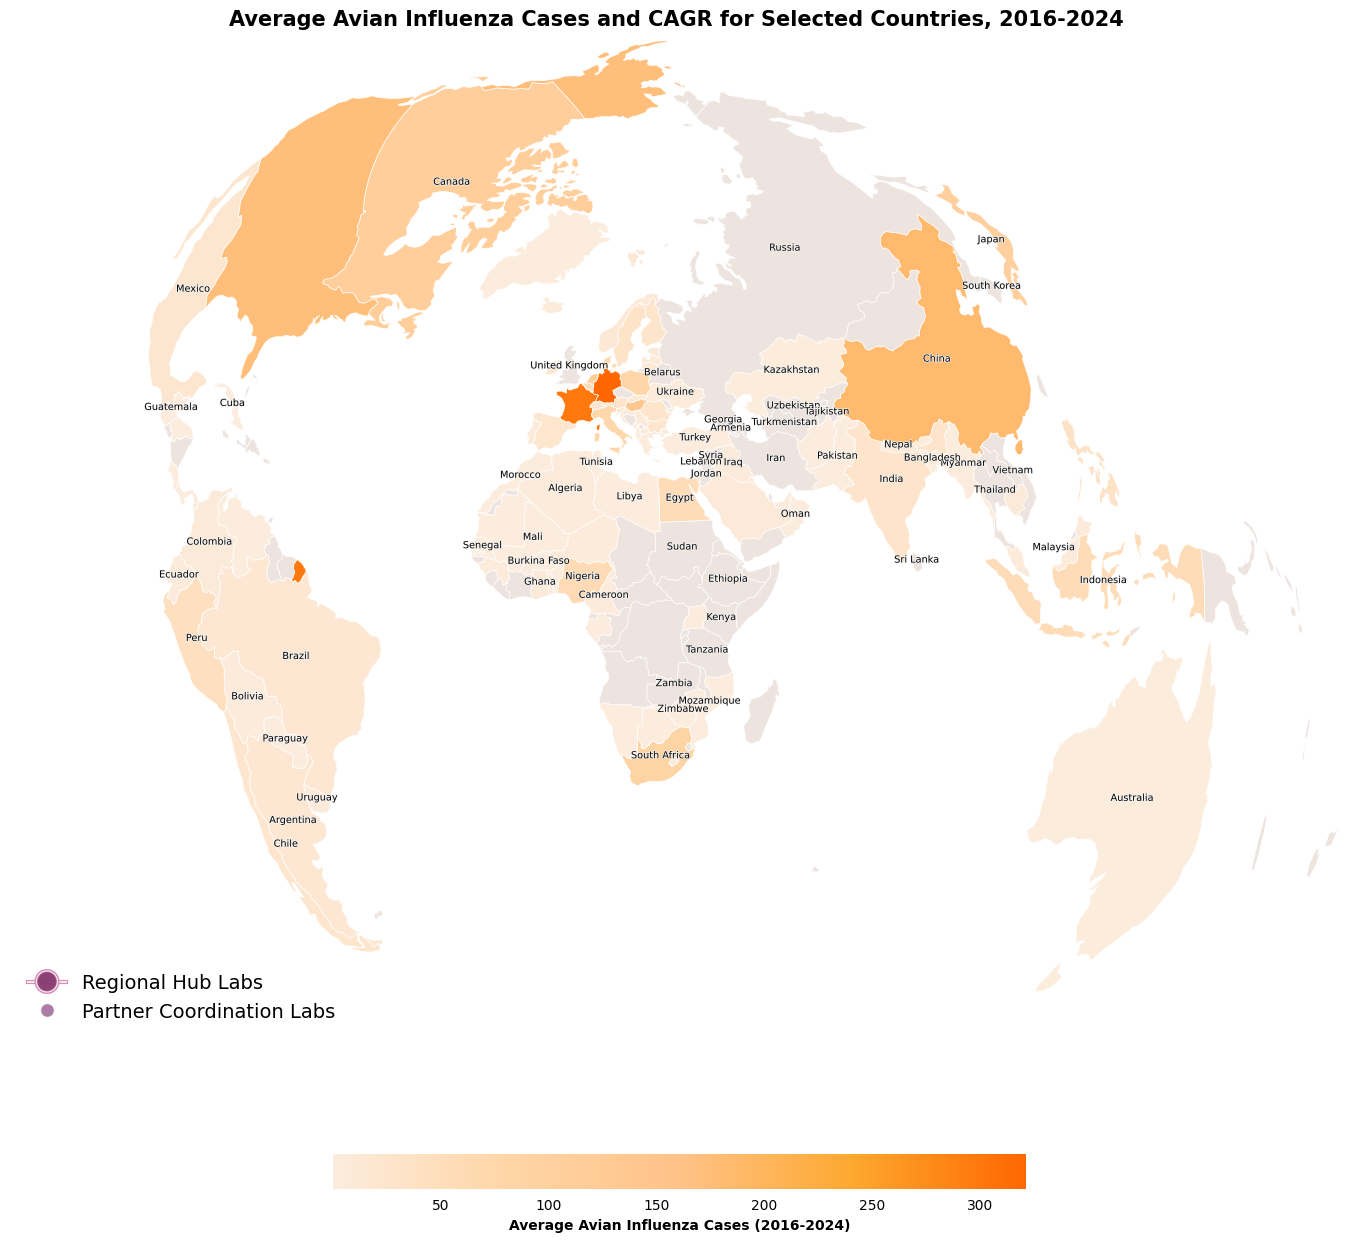

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D
from matplotlib import patheffects
from zipfile import ZipFile
import requests
from io import BytesIO

# Function to download and extract Natural Earth dataset
def download_and_extract_natural_earth(url, extract_to='/content/'):
    response = requests.get(url)
    if response.status_code == 200:
        with ZipFile(BytesIO(response.content)) as zip_ref:
            zip_ref.extractall(extract_to)
    else:
        print("Failed to download data. Please check the URL or try again later.")

# Download Natural Earth dataset
url = 'https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip'
download_and_extract_natural_earth(url)

# Load world map data
world = gpd.read_file('/content/ne_110m_admin_0_countries.shp')

# Remove Antarctica and small islands from the dataset
world = world[world['NAME'] != 'Antarctica']

# Filter out small polygons by setting a minimum area threshold
#world = world[world.geometry.area > 1e5]

# Adjust projection to reduce distortion and focus on central landmass
azimuthal_proj = "+proj=aeqd +lat_0=10 +lon_0=20"  # Center adjusted for central landmass
world = world.to_crs(azimuthal_proj)

# Load avian influenza data
data = pd.read_excel('/content/drive/MyDrive/data/AI Cases.xlsx')  # Ensure correct path
data['Report.date'] = pd.to_datetime(data['Report.date..dd.mm.yyyy.'], dayfirst=True, errors='coerce')
data['year'] = data['Report.date'].dt.year

# Filter data for the years 2016-2024
filtered_data = data[(data['year'] >= 2016) & (data['year'] <= 2024)]

# Calculate the average cases per country
average_cases = filtered_data.groupby('Country').size() / (2024 - 2016 + 1)
world = world.merge(average_cases.rename('Avg_Cases'), how='left', left_on='NAME', right_index=True)

# Warm color gradient for average cases
colors = ["#FCECDD", "#FFD5A6", "#FFC288", "#FEA82F", "#FF6701"]  # Warm color gradient
custom_cmap = LinearSegmentedColormap.from_list("custom_gradient", colors)
norm = plt.Normalize(vmin=world['Avg_Cases'].min(), vmax=world['Avg_Cases'].max())

# Load lab data
lab_file_path = '/content/drive/MyDrive/data/VETLAB Members all.xlsx'
lab_data = pd.read_excel(lab_file_path, sheet_name='Sheet1')
lab_data = lab_data[(lab_data['Pl. Lat'] != 0) & (lab_data['Pl. Lon'] != 0)]  # Filter valid coordinates

# Convert lab data to GeoDataFrame and set projection
labs_gdf = gpd.GeoDataFrame(lab_data, geometry=gpd.points_from_xy(lab_data['Pl. Lon'], lab_data['Pl. Lat']), crs="EPSG:4326")
labs_gdf = labs_gdf.to_crs(azimuthal_proj)

# Define Vienna's approximate new location in the adjusted projection
vienna_x, vienna_y = -290418, 4239396  # Adjusted projection center for Vienna

# List of countries to label
countries_to_label = ["Canada","United States", "Mexico", "Guatemala", "China", "Cuba", "Colombia", "Ecuador", "Peru", "Chile",
                      "Bolivia", "Paraguay", "Argentina", "Uruguay", "Brazil", "Morocco", "Algeria", "Tunisia", "Libya",
                      "Egypt", "Mali", "Burkina Faso", "Senegal", "Nigeria", "Ghana", "Cameroon", "Sudan", "Ethiopia",
                      "Kenya", "Tanzania", "Zambia", "Zimbabwe", "Mozambique", "South Africa", "United Kingdom",
                      "Belarus", "Russia", "Ukraine", "Turkey", "Georgia", "Armenia", "Uzbekistan",
                      "Kazakhstan", "Tajikistan", "Turkmenistan", "Iran", "Iraq", "Syria", "Lebanon",
                      "Jordan", "UAE", "Oman", "Pakistan", "India", "Sri Lanka", "Nepal", "Bangladesh", "Myanmar",
                      "Thailand", "Vietnam", "Malaysia", "Indonesia", "South Korea", "Japan", "Australia"]

# Plot map with adjusted projection and limited focus on central landmass
fig, ax = plt.subplots(figsize=(20, 15))
ax.set_xlim([-15000000, 17000000])   # Custom zoom to show central landmass only
ax.set_ylim([-11000000, 13000000])

# Plot the map with color based on average cases
world.plot(ax=ax, color=world['Avg_Cases'].map(lambda x: custom_cmap(norm(x)) if pd.notnull(x) else '#EDE4E0'),
           edgecolor="white", linewidth=0.5)

# Add title mentioning average cases and CAGR
ax.set_title("Average Avian Influenza Cases and CAGR for Selected Countries, 2016-2024 ", fontsize=15, fontweight="bold")

# Add color bar for the average cases with improved aesthetics
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)

# Horizontal color bar without a border and with triangular end caps
cbar = plt.colorbar(sm, ax=ax, orientation="horizontal", fraction=0.03, pad=0.1)
cbar.set_label("Average Avian Influenza Cases (2016-2024)", fontsize=10, fontweight='bold')

# Remove the color bar's border
cbar.outline.set_visible(False)

# Triangular end caps
# Set the minimum and maximum values with triangular shapes
cbar.ax.minorticks_on()
cbar.ax.tick_params(which="both", width=0)  # Hide tick marks for cleaner look

# Hide axis
ax.axis("off")

# Plot labs with high-contrast colors for visibility and solid lines to Vienna
#for idx, row in labs_gdf.iterrows():
    #x, y = row.geometry.x, row.geometry.y
    #if row['Developed Lab'] == 1:
        # Regional Hub Labs - larger, bright orange marker with shadow effect
        #ax.scatter(x, y, color='#863A6F', s=90, alpha=1, edgecolor="white", linewidth=0.8, zorder=5,
                   #path_effects=[patheffects.withStroke(linewidth=30, foreground="#D989B5", alpha=0.4)])
   #else:
        # Partner Coordination Labs - smaller, yellow marker
        #ax.scatter(x, y, color='#975C8D', s=70, alpha=1, edgecolor="white", linewidth=0.8, zorder=4)

    # Draw solid line from lab to Vienna
    #ax.plot([x, vienna_x], [y, vienna_y], color='#FFADBC', linestyle="-", linewidth=0.6, alpha=0.5, zorder=2)

# Label specified countries
for idx, row in world.iterrows():
    country_name = row['NAME']
    if country_name in countries_to_label:
        x, y = row['geometry'].centroid.coords[0]
        ax.text(x, y, country_name, fontsize=7, ha='center', color="black", fontweight='light', zorder=6, alpha=1,
                path_effects=[patheffects.withStroke(linewidth=1, foreground="whitesmoke")])

# Add legend for labs without a border and with customized font
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Regional Hub Labs',
           markerfacecolor='#863A6F', markersize=15, alpha=0.8,
           path_effects=[patheffects.withStroke(linewidth=3, foreground="#D989B5")]),
    Line2D([0], [0], marker='o', color='w', label='Partner Coordination Labs',
           markerfacecolor='#975C8D', markersize=10, alpha=0.8)
]
ax.legend(handles=legend_elements, loc='lower left', frameon=False, prop={'size': 14, 'weight': 'light'}, fancybox=True)
plt.savefig('/content/drive/MyDrive/figures/Vetlabs_Overview_HighRes_with_AAI_002.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


